# Integrated Annotation

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import sctk as sk
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as mpl
from matplotlib.pyplot import rc_context
from glob import glob
import tarfile
import anndata
import warnings


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='OrRd')
sc.logging.print_header()


scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.21.1 scipy==1.7.0 pandas==1.5.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


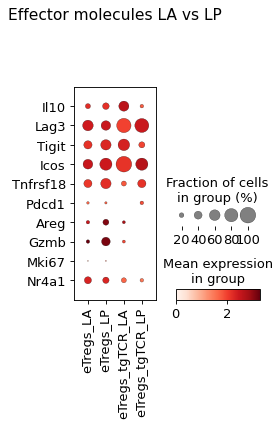

In [19]:
#Effector molecules tgTCR vs non tgTCR
with mpl.rc_context({'figure.figsize': (3.5, 5)}):#Gitr = Tnfrsf18, OX40 = Tnfrsf4, Nur77 = Nr4a1
    sc.pl.dotplot(adata_eTregs, ['Il10', 'Lag3','Tigit','Icos','Tnfrsf18', 'Pdcd1','Areg','Gzmb','Mki67','Nr4a1'], groupby='cellsubsetLoc_tag',
                  dendrogram=False, title='Effector molecules LA vs LP', use_raw=True, , mean_only_expressed=True, save='Effector_molecules_eTregs_LAvsLP.pdf')

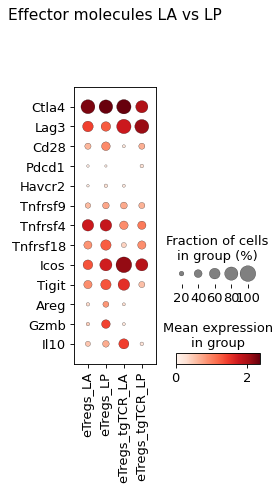

In [29]:
#Effector molecules tgTCR vs non tgTCR
with mpl.rc_context({'figure.figsize': (3.5, 5)}):#Gitr = Tnfrsf18, OX40 = Tnfrsf4, Nur77 = Nr4a1,Havcr2=TIM-3,  'Tnfrsf9'=CD137;
    sc.pl.dotplot(adata_eTregs, Interesting_genes, groupby='cellsubsetLoc_tag',
                  dendrogram=False, title='Effector molecules LA vs LP', use_raw=True,swap_axes=True, save='Effector_molecules_eTregs_LAvsLP4_tTCR')

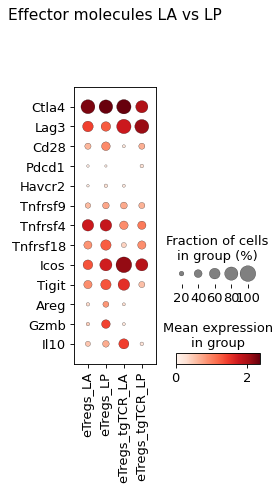

In [20]:
#Effector molecules tgTCR vs non tgTCR
with mpl.rc_context({'figure.figsize': (3.5, 5)}):#Gitr = Tnfrsf18, OX40 = Tnfrsf4, Nur77 = Nr4a1,Havcr2=TIM-3,  'Tnfrsf9'=CD137;
    sc.pl.dotplot(adata_eTregs, Interesting_genes, groupby='cellsubsetLoc_tag',
                  dendrogram=False, title='Effector molecules LA vs LP', use_raw=True,swap_axes=True,expression_cutoff=0.5, save='Effector_molecules_eTregs_LAvsLP4_tTCR_cutoff.pdf')

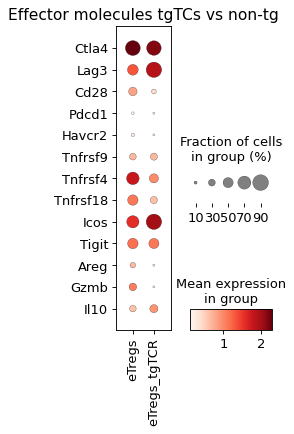

In [32]:
#Effector molecules tgTCR vs non tgTCR
#Gitr = Tnfrsf18, OX40 = Tnfrsf4, Nur77 = Nr4a1
sc.pl.dotplot(adata_eTregs, Interesting_genes, groupby='cellsubset_tgTCR',
                  dendrogram=False, title='Effector molecules tgTCs vs non-tg', figsize=(2.5,5),use_raw=True,swap_axes=True, save='Effector_molecules_tgTCR_bulk.pdf')

In [30]:
#'Il27ra', 'Il2ra','Cd40lg',removed
Interesting_genes_f=[ 'Ctla4','Lag3','Cd28',  'Tnfrsf9', 'Tnfrsf4', 'Tnfrsf18',
                   'Icos','Tigit']#'Blimp'=Prdm1, Havcr2=Tim-3

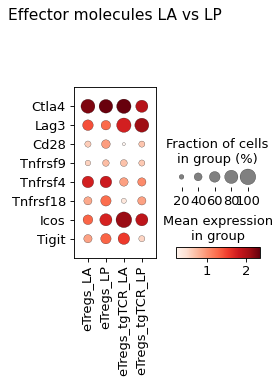

In [31]:
#Effector molecules tgTCR vs non tgTCR
with mpl.rc_context({'figure.figsize': (3.5, 5)}):#Gitr = Tnfrsf18, OX40 = Tnfrsf4, Nur77 = Nr4a1,Havcr2=TIM-3,  'Tnfrsf9'=CD137;
    sc.pl.dotplot(adata_eTregs, Interesting_genes_f, groupby='cellsubsetLoc_tag',
                  dendrogram=False, title='Effector molecules LA vs LP', use_raw=True,swap_axes=True, save='Effector_molecules_eTregs_LAvsLP_tTCR_filt')

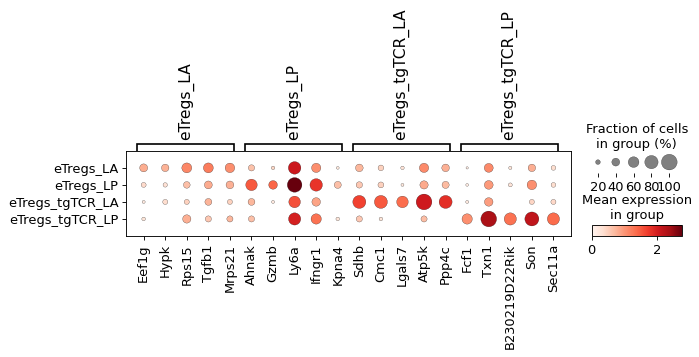

In [103]:
mkst = calc_marker_stats(adata_eTregs, groupby="cellsubsetLoc_tag")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata_eTregs, groupby='cellsubsetLoc_tag', mks=mks)

In [33]:
Tregs=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/Treg_object_new.h5ad')

In [44]:
tgTCR.index

Index(['CCACTACCACATCCAA-1-0', 'GTACGTAAGATCCCGC-1-0', 'TACTTGTAGTCAATAG-1-0',
       'AAACCTGCATAACCTG-1-1', 'ACATACGGTGATGTCT-1-1', 'GGTATTGTCGATAGAA-1-1',
       'CAGCGACTCTCGAGTA-1-2', 'CAGCGACTCTGCCCTA-1-2', 'CGTAGCGCAGGACGTA-1-2',
       'CTAACTTAGCACCGCT-1-2', 'GATCGCGGTTCGCGAC-1-2', 'GCGCGATGTCACCTAA-1-2',
       'GGAAAGCCATGCTAGT-1-2', 'GTAACTGCAGATCTGT-1-2', 'GTCGTAAAGATATGCA-1-2',
       'TTCGAAGAGCGTTGCC-1-2', 'TTGTAGGGTGCCTGTG-1-2', 'AAGGAGCCACTGTTAG-1-3',
       'CCGTACTAGTGTACTC-1-3', 'CTCATTATCCAGAAGG-1-3', 'GCTTGAATCGGAATCT-1-3',
       'GGATTACTCATAGCAC-1-3', 'GGGAATGTCAATCACG-1-3', 'TACTTACAGTCAAGCG-1-3'],
      dtype='object')

In [46]:
Tregs.obs.loc[Tregs.obs["IR_VDJ_1_cdr3"] == "CASSITTSAETLYF","tag"]='tgTCR'
Tregs.obs.loc[lambda df: df.index.isin(tgTCR.index),'tag'] = 'tgTCR'

In [49]:
Tregs.obs['tag'].value_counts()

tgTCR    24
Name: tag, dtype: int64

In [59]:
Tregs.uns['tag_colors'] = ['#b2182b','#e0f3f8']

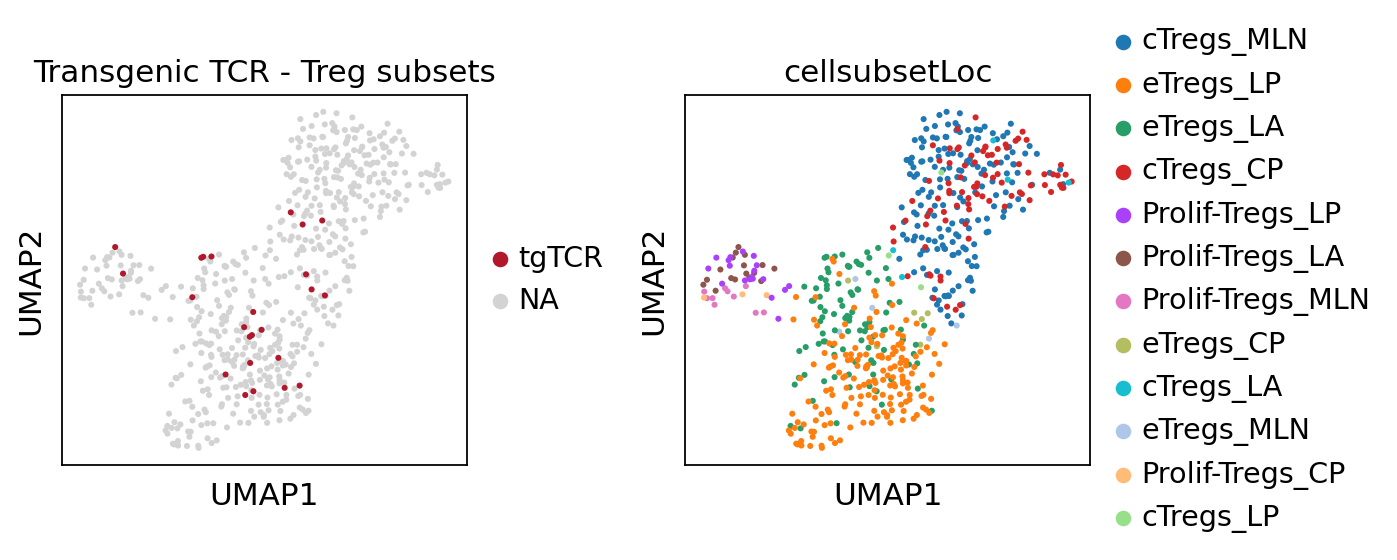

In [78]:
with mpl.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(Tregs, color=["tag",'cellsubsetLoc'], size=[30],title="Transgenic TCR - Treg subsets",wspace=0.4, save='tgTCR-Tregs_umap.pdf')

## LogFold change myeloid - TCs

In [80]:
adata_Mye=adata[adata.obs["lineage_new"].isin(['Myeloid'])]

In [81]:
adata_Mye

View of AnnData object with n_obs × n_vars = 2693 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n

In [331]:
dict(zip(adata_Mye.obs['final_annotation'].cat.categories, adata_Mye.uns[f"{'final_annotation'}_colors"]))

{'DC1.Cd8+Xcr1+': '#ff4a46',
 'DC1.apopt.': '#008941',
 'DC.Il1b_high.Cd103+': '#006fa6',
 'DC.Il1b_high.Cd103+Sirpa+': '#a30059',
 'DC.Il1b_low.Cd103-Sirpa+': '#ffdbe5',
 'DC.Sirpa+Cd81+': '#7a4900',
 'DC.prolif.': '#0000a6',
 'Lymph.DC.Cd8+': '#000035',
 'Lymph.DC.Cd81+': '#7b4f4b',
 'Lymph.DC.Il1b_high.prolif.': '#a1c299',
 'Lymph.DC.Sirpa+': '#300018',
 'Mac.Cd206+': '#00846f',
 'Mac.Il1b+': '#372101',
 'Mac.Sirpa+': '#ffb500',
 'Mono.Il1b+': '#a079bf',
 'Mono.Sirpa+': '#cc0744',
 'pDCs': '#c8a1a1',
 'pre-DC': '#1e6e00'}

In [332]:
adata.obs["lineage_final"].value_counts()

B-PCs           3912
ILCs-T.cells    2698
Myeloid         2693
Mesenchymal     1400
doublets        1034
Granulocytes      88
Epithelial        25
Mast cells        15
Name: lineage_final, dtype: int64

In [82]:
adata_tMye=adata_Mye[adata_Mye.obs["location"].isin(['LA','LP'])]

In [93]:
adata_tMye

View of AnnData object with n_obs × n_vars = 930 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_

In [94]:
 palette_Mye={'DC1.Cd8+Xcr1+': '#023fa5ff',
     'DC1.apopt.': '#7d87b9ff',
     'DC.Il1b_high.Cd103+': '#bec1d4ff',
     'DC.Il1b_high.Cd103+Sirpa+': '#d6bcc0ff',
     'DC.Il1b_low.Cd103-Sirpa+': '#bb7784ff',
     'DC.Sirpa+Cd81+': '#8e063bff',
     'DC.prolif.': '#4a6fe3ff',
     'Lymph.DC-PC.Doublets': '#252525ff',
     'Lymph.DC.Cd8+': '#b5bbe3ff',
     'Lymph.DC.Cd81+': '#e6afb9ff',
     'Lymph.DC.Il1b_high.prolif.': '#e07b91ff',
     'Lymph.DC.Sirpa+': '#d33f6aff',
     'Mac.Cd206+': '#fdae61ff',
     'Mac.Il1b+': '#fee0b6ff',
     'Mac.Sirpa+': '#bf812dff',
     'Mono.Il1b+': '#f46d43ff',
     'Mono.Sirpa+': '#f4a582ff',
     'Myeloid-PC doublets.1': '#969696ff',
     'Myeloid-PC doublets.3': '#d9d9d9ff',
     'Myeloid-PC doublets.4': '#737373ff',
     'Myeloid-PC doublets.5': '#d5eae7ff',
     'Myeloid-PC doublets.6': '#525252ff',
     'Myeloid-TC doublets.2': '#bababaff',
     'Myeloid-TC-doublets': '#e0e0e0ff',
     'pDCs': '#762a83ff',
     'pre-DC': '#c7c7c7ff'}

In [95]:
tmp1 = pd.crosstab(adata_tMye.obs["final_annotation"], adata_tMye.obs["location"],normalize='index')
tmp1['LPm']=tmp1['LP']+0.01
tmp1['LAm']=tmp1['LA']+0.01
tmp1['FC'] = np.log2(tmp1['LPm'].div(tmp1['LAm'].values))

In [96]:
tmp1

location                         LA        LP       LPm       LAm        FC
final_annotation                                                           
DC1.Cd8+Xcr1+              1.000000  0.000000  0.010000  1.010000 -6.658211
DC.Il1b_high.Cd103+        0.290323  0.709677  0.719677  0.300323  1.260837
DC.Il1b_high.Cd103+Sirpa+  0.621429  0.378571  0.388571  0.631429 -0.700440
DC.prolif.                 0.244898  0.755102  0.765102  0.254898  1.585732
Lymph.DC.Cd8+              0.500000  0.500000  0.510000  0.510000  0.000000
Lymph.DC.Sirpa+            1.000000  0.000000  0.010000  1.010000 -6.658211
Mac.Cd206+                 0.114943  0.885057  0.895057  0.124943  2.840716
Mac.Il1b+                  0.083544  0.916456  0.926456  0.093544  3.308000
Mono.Il1b+                 0.033333  0.966667  0.976667  0.043333  4.494317
Mono.Sirpa+                0.600000  0.400000  0.410000  0.610000 -0.573185

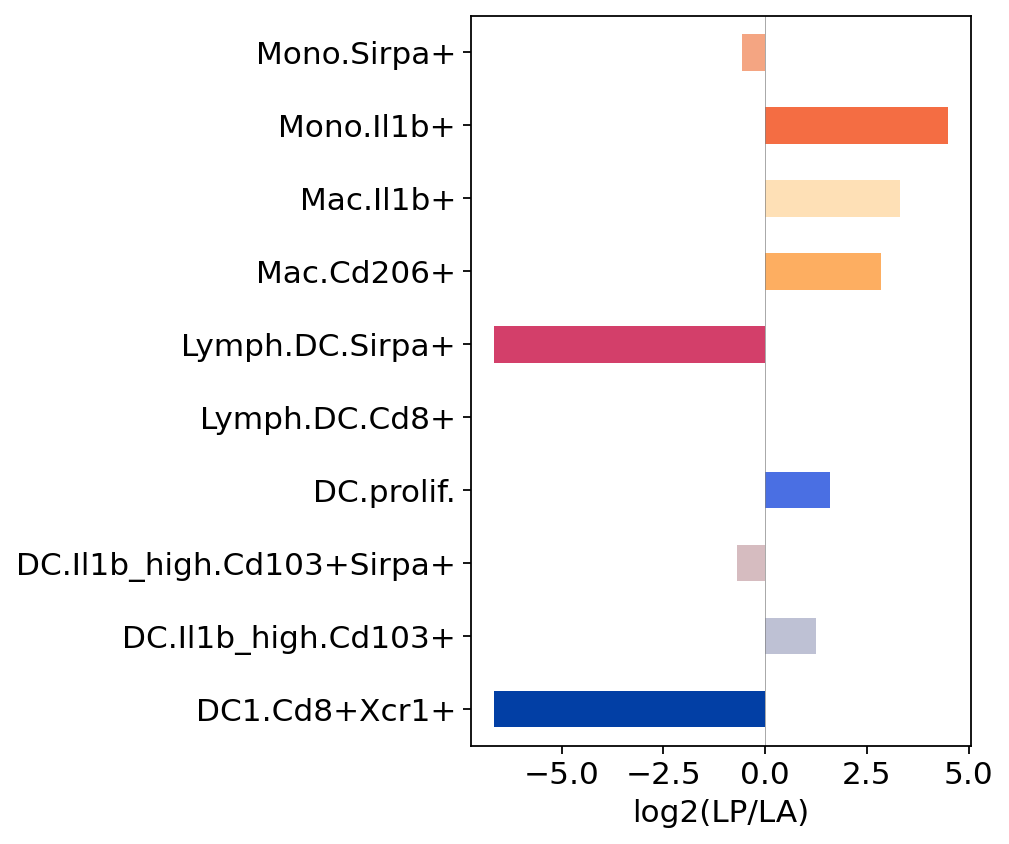

In [97]:
with mpl.rc_context({'figure.figsize': (4, 6)}):
    fig, ax = mpl.subplots()

    tmp1['FC'].plot(kind='barh',ax=ax,figsize=(4,6),color=['#023fa5ff','#bec1d4ff','#d6bcc0ff','#4a6fe3ff','#b5bbe3ff','#d33f6aff',
                                                     '#fdae61ff', '#fee0b6ff', '#f46d43ff','#f4a582ff'],grid=False)

    ax.axvline(0, color='grey', linewidth=0.3)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('log2(LP/LA)')
    ax.set_ylabel('')
mpl.savefig('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/figures/LogFC_Mye.pdf', format='pdf')

In [98]:
adata_TCs=adata[adata.obs["lineage_new"].isin(['ILCs-T.cells'])]

In [99]:
adata_TCs

View of AnnData object with n_obs × n_vars = 2698 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n

In [86]:
adata_tTCs=adata_TCs[adata_TCs.obs["location"].isin(['LA','LP'])]

In [87]:
adata_tTCs

View of AnnData object with n_obs × n_vars = 685 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_

In [88]:
tmp2 = pd.crosstab(adata_tTCs.obs["final_annotation"], adata_tTCs.obs["location"],normalize='index')
tmp2['LPm']=tmp2['LP']+0.01
tmp2['LAm']=tmp2['LA']+0.01
tmp2['FC'] = np.log2(tmp2['LPm'].div(tmp2['LAm'].values))

In [89]:
tmp2

location                    LA        LP       LPm       LAm        FC
final_annotation                                                      
CD4.memory            0.198020  0.801980  0.811980  0.208020  1.964724
ILC2s                 0.169811  0.830189  0.840189  0.179811  2.224229
ILC3s.Rorgt+          0.973684  0.026316  0.036316  0.983684 -4.759526
ILC3s.Rorgt+.MHCIIhi  1.000000  0.000000  0.010000  1.010000 -6.658211
LTi-like.ILC3s        0.750000  0.250000  0.260000  0.760000 -1.547488
NK-NKT-gdTCs          0.285714  0.714286  0.724286  0.295714  1.292355
Naïve.CD4+CD8+        1.000000  0.000000  0.010000  1.010000 -6.658211
Naïve.CD8+.pop2       1.000000  0.000000  0.010000  1.010000 -6.658211
Prolif-Tregs          0.459459  0.540541  0.550541  0.469459  0.229848
Th17                  0.333333  0.666667  0.676667  0.343333  0.978835
cTregs                0.833333  0.166667  0.176667  0.843333 -2.255073
eTregs                0.365672  0.634328  0.644328  0.375672  0.778324
gdTCs.Th17            0.200000  0.800000  0.810000  0.210000  1.947533

In [90]:
palette_TCsILCs={'CD4.memory': '#d33f6aff',
 'ILC2s': '#e377c2ff',
 'ILC3s.Rorgt+': '#bcbd22ff',
 'ILC3s.Rorgt+.MHCIIhi': '#17becfff',
 'LTi-like.ILC3s': '#7f7f7fff',
 'NK-NKT-gdTCs': '#11c638ff',
 'Naïve.CD4+.pop1': '#7d87b9ff',
 'Naïve.CD4+.pop2': '#e6afb9ff',
 'Naïve.CD4+CD8+': '#f0b98dff',
 'Naïve.CD8+.pop1': '#8e063bff',
 'Naïve.CD8+.pop2': '#8595e1ff',
 'Prolif-Tregs': '#ef9708ff',
 'Th17': '#c6dec7ff',
 'cTregs': '#b5bbe3ff',
 'eTregs': '#4a6fe3ff',
 'gdTCs.Th17': '#336600ff'}

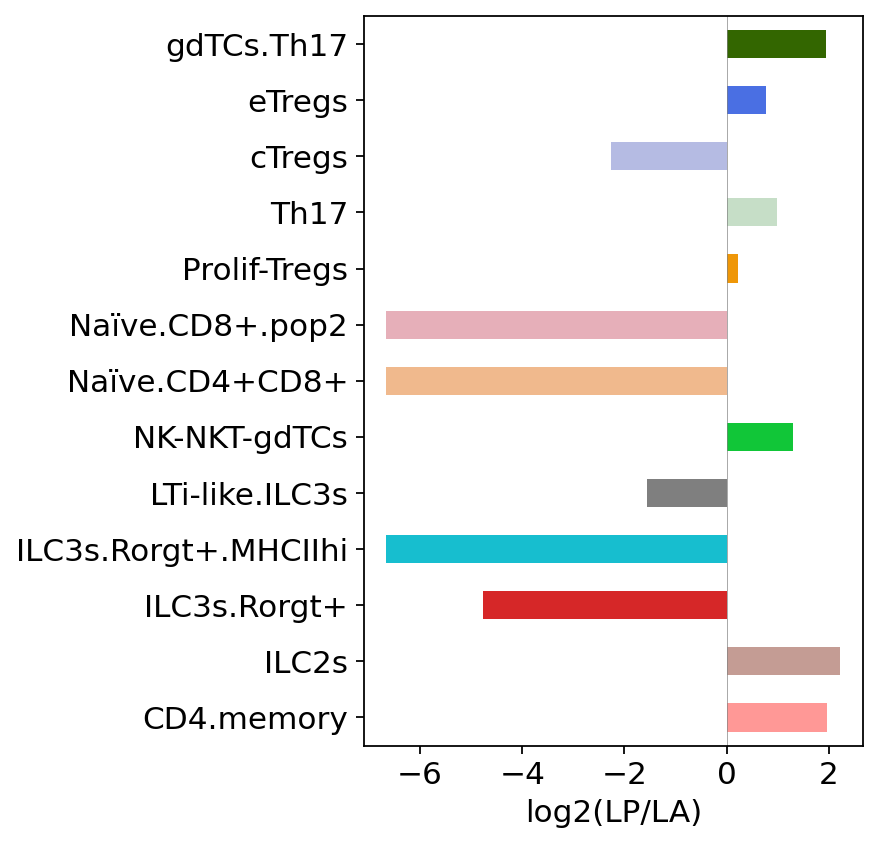

In [91]:
with mpl.rc_context({'figure.figsize': (4, 6)}):
    fig, ax = mpl.subplots()

    tmp2['FC'].plot(kind='barh',ax=ax,figsize=(4,6),color=['#ff9896','#c49c94','#d62728','#17becfff','#7f7f7fff','#11c638ff',
                                                   '#f0b98dff', '#e6afb9ff', '#ef9708ff', '#c6dec7ff','#b5bbe3ff','#4a6fe3ff','#336600ff'],grid=False)

    ax.axvline(0, color='grey', linewidth=0.3)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('log2(LP/LA)')
    ax.set_ylabel('')
mpl.savefig('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/figures/LogFC_TCs.pdf', format='pdf')

In [100]:
tmp3=pd.concat([tmp1,tmp2])

In [101]:
color_list=['#023fa5ff','#bec1d4ff','#d6bcc0ff','#4a6fe3ff','#b5bbe3ff','#d33f6aff',
                                                     '#fdae61ff', '#fee0b6ff', '#f46d43ff','#f4a582ff',
          '#ff9896','#c49c94','#d62728','#17becfff','#7f7f7fff','#11c638ff',
                                                   '#f0b98dff', '#e6afb9ff', '#ef9708ff', '#c6dec7ff','#b5bbe3ff','#4a6fe3ff','#336600ff' ]

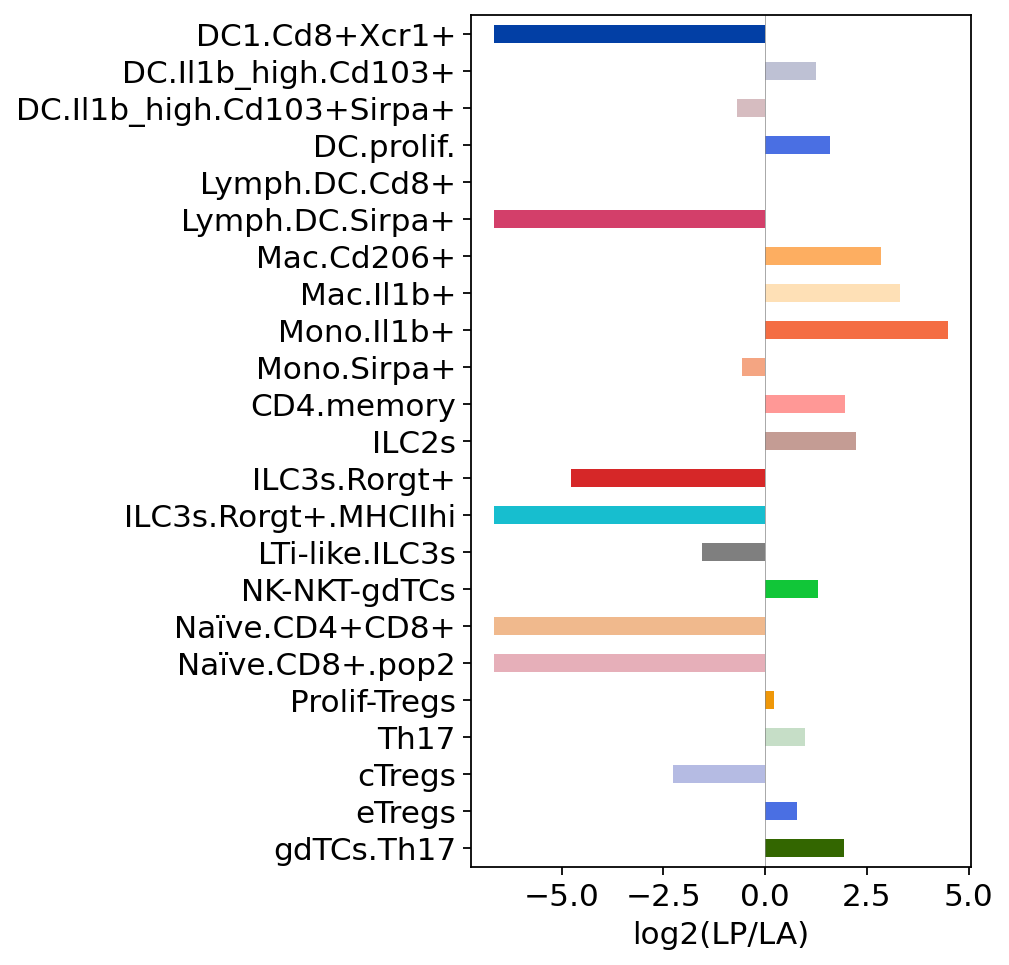

In [102]:
with mpl.rc_context({'figure.figsize': (4, 7)}):
    fig, ax = mpl.subplots()

    tmp3['FC'].plot(kind='barh',ax=ax,figsize=(4,7),color=color_list ,grid=False)

    ax.axvline(0, color='grey', linewidth=0.3)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('log2(LP/LA)')
    ax.set_ylabel('')
mpl.savefig('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/figures/LogFC_Mye-TCs.pdf', format='pdf')

In [103]:
adata_TCsMye = adata[adata.obs["lineage_final"].isin(['Myeloid','ILCs-T.cells'])]

In [104]:
dict(zip(adata_TCsMye.obs['final_annotation'].cat.categories, adata_TCsMye.uns[f"{'final_annotation'}_colors"]))

{'CD4.memory': '#ff34ff',
 'DC1.Cd8+Xcr1+': '#ff4a46',
 'DC1.apopt.': '#008941',
 'DC.Il1b_high.Cd103+': '#006fa6',
 'DC.Il1b_high.Cd103+Sirpa+': '#a30059',
 'DC.Il1b_low.Cd103-Sirpa+': '#ffdbe5',
 'DC.Sirpa+Cd81+': '#7a4900',
 'DC.prolif.': '#0000a6',
 'ILC2s': '#6b7900',
 'ILC3s.Rorgt+': '#00c2a0',
 'ILC3s.Rorgt+.MHCIIhi': '#ffaa92',
 'LTi-like.ILC3s': '#d16100',
 'Lymph.DC.Cd8+': '#000035',
 'Lymph.DC.Cd81+': '#7b4f4b',
 'Lymph.DC.Il1b_high.prolif.': '#a1c299',
 'Lymph.DC.Sirpa+': '#300018',
 'Mac.Cd206+': '#00846f',
 'Mac.Il1b+': '#372101',
 'Mac.Sirpa+': '#ffb500',
 'Mono.Il1b+': '#a079bf',
 'Mono.Sirpa+': '#cc0744',
 'NK-NKT-gdTCs': '#788d66',
 'Naïve.CD4+.pop1': '#ff8a9a',
 'Naïve.CD4+.pop2': '#d157a0',
 'Naïve.CD4+CD8+': '#bec459',
 'Naïve.CD8+.pop1': '#456648',
 'Naïve.CD8+.pop2': '#0086ed',
 'Prolif-Tregs': '#575329',
 'Th17': '#00fecf',
 'cTregs': '#b05b6f',
 'eTregs': '#3b9700',
 'gdTCs.Th17': '#04f757',
 'pDCs': '#c8a1a1',
 'pre-DC': '#1e6e00'}

In [105]:
palette_MyeTCs= {'CD4.memory': '#d33f6aff',
        'DC1.Cd8+Xcr1+': '#023fa5ff',
         'DC1.apopt.': '#7d87b9ff',
         'DC.Il1b_high.Cd103+': '#bec1d4ff',
         'DC.Il1b_high.Cd103+Sirpa+': '#d6bcc0ff',
         'DC.Il1b_low.Cd103-Sirpa+': '#bb7784ff',
         'DC.Sirpa+Cd81+': '#8e063bff',
         'DC.prolif.': '#4a6fe3ff',
         'ILC2s': '#e377c2ff',
         'ILC3s.Rorgt+': '#bcbd22ff',
         'ILC3s.Rorgt+.MHCIIhi': '#17becfff',
         'LTi-like.ILC3s': '#7f7f7fff',
         'Lymph.DC.Cd8+': '#b5bbe3ff',
         'Lymph.DC.Cd81+': '#e6afb9ff',
         'Lymph.DC.Il1b_high.prolif.': '#e07b91ff',
         'Lymph.DC.Sirpa+': '#d33f6aff',
         'Mac.Cd206+': '#fdae61ff',
         'Mac.Il1b+': '#fee0b6ff',
         'Mac.Sirpa+': '#bf812dff',
         'Mono.Il1b+': '#f46d43ff',
         'Mono.Sirpa+': '#f4a582ff',    
         'NK-NKT-gdTCs': '#11c638ff',
         'Naïve.CD4+.pop1': '#7d87b9ff',
         'Naïve.CD4+.pop2': '#e6afb9ff',
         'Naïve.CD4+CD8+': '#f0b98dff',
         'Naïve.CD8+.pop1': '#8e063bff',
         'Naïve.CD8+.pop2': '#8595e1ff',
         'Prolif-Tregs': '#ef9708ff',
         'Th17': '#c6dec7ff',
         'cTregs': '#b5bbe3ff',
         'eTregs': '#4a6fe3ff',
         'gdTCs.Th17': '#336600ff',
         'pDCs': '#762a83ff',
         'pre-DC': '#c7c7c7ff'}

In [106]:
palette_MyeTCs.values()

dict_values(['#d33f6aff', '#023fa5ff', '#7d87b9ff', '#bec1d4ff', '#d6bcc0ff', '#bb7784ff', '#8e063bff', '#4a6fe3ff', '#e377c2ff', '#bcbd22ff', '#17becfff', '#7f7f7fff', '#b5bbe3ff', '#e6afb9ff', '#e07b91ff', '#d33f6aff', '#fdae61ff', '#fee0b6ff', '#bf812dff', '#f46d43ff', '#f4a582ff', '#11c638ff', '#7d87b9ff', '#e6afb9ff', '#f0b98dff', '#8e063bff', '#8595e1ff', '#ef9708ff', '#c6dec7ff', '#b5bbe3ff', '#4a6fe3ff', '#336600ff', '#762a83ff', '#c7c7c7ff'])

In [108]:
#adata_TCsMye.uns['final_annotation_colors']

In [109]:
adata_fTCsMye = adata_TCsMye[adata_TCsMye.obs['cellsubsetLoc'].map(adata_TCsMye.obs['cellsubsetLoc'].value_counts())>30]

<AxesSubplot:>

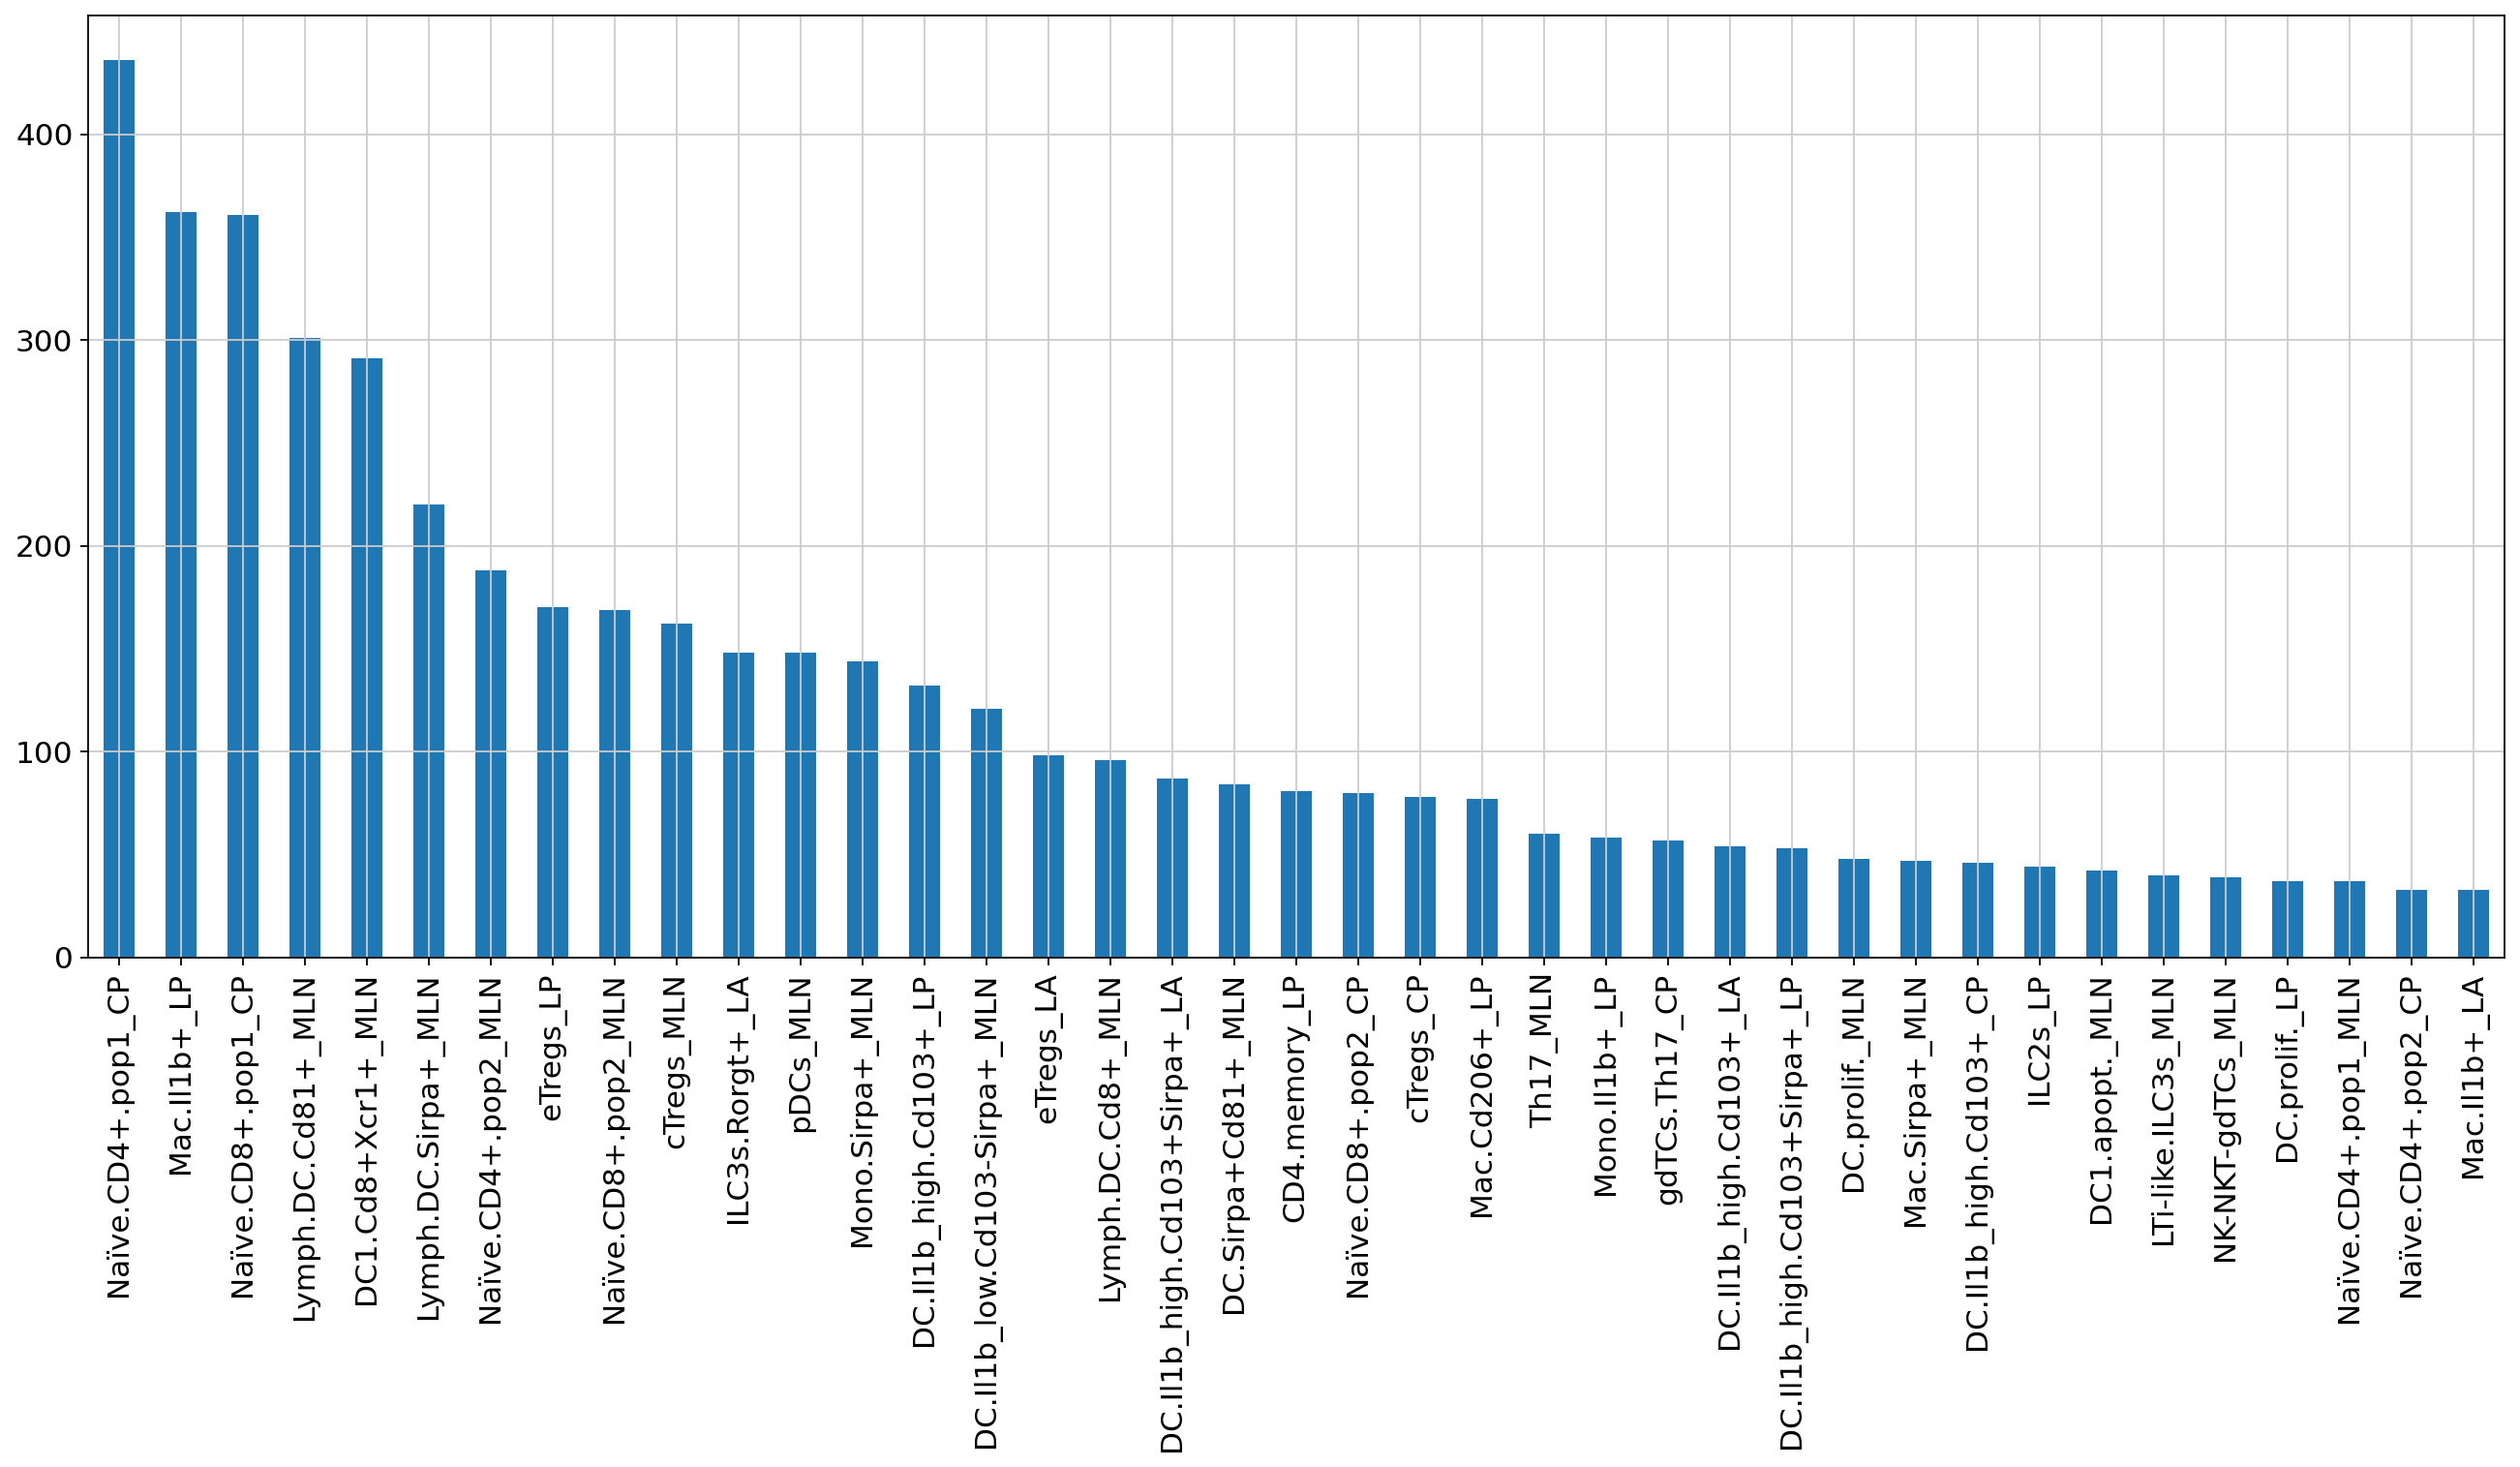

In [140]:
adata_fTCsMye.obs['cellsubsetLoc'].value_counts().plot(kind='bar', figsize=(20,8))

In [438]:
#adata_fTCsMye 

In [119]:
adata_fTCsMye_LA_LP=adata_fTCsMye[adata_fTCsMye.obs["location"].isin(['LA','LP'])]

<AxesSubplot:>

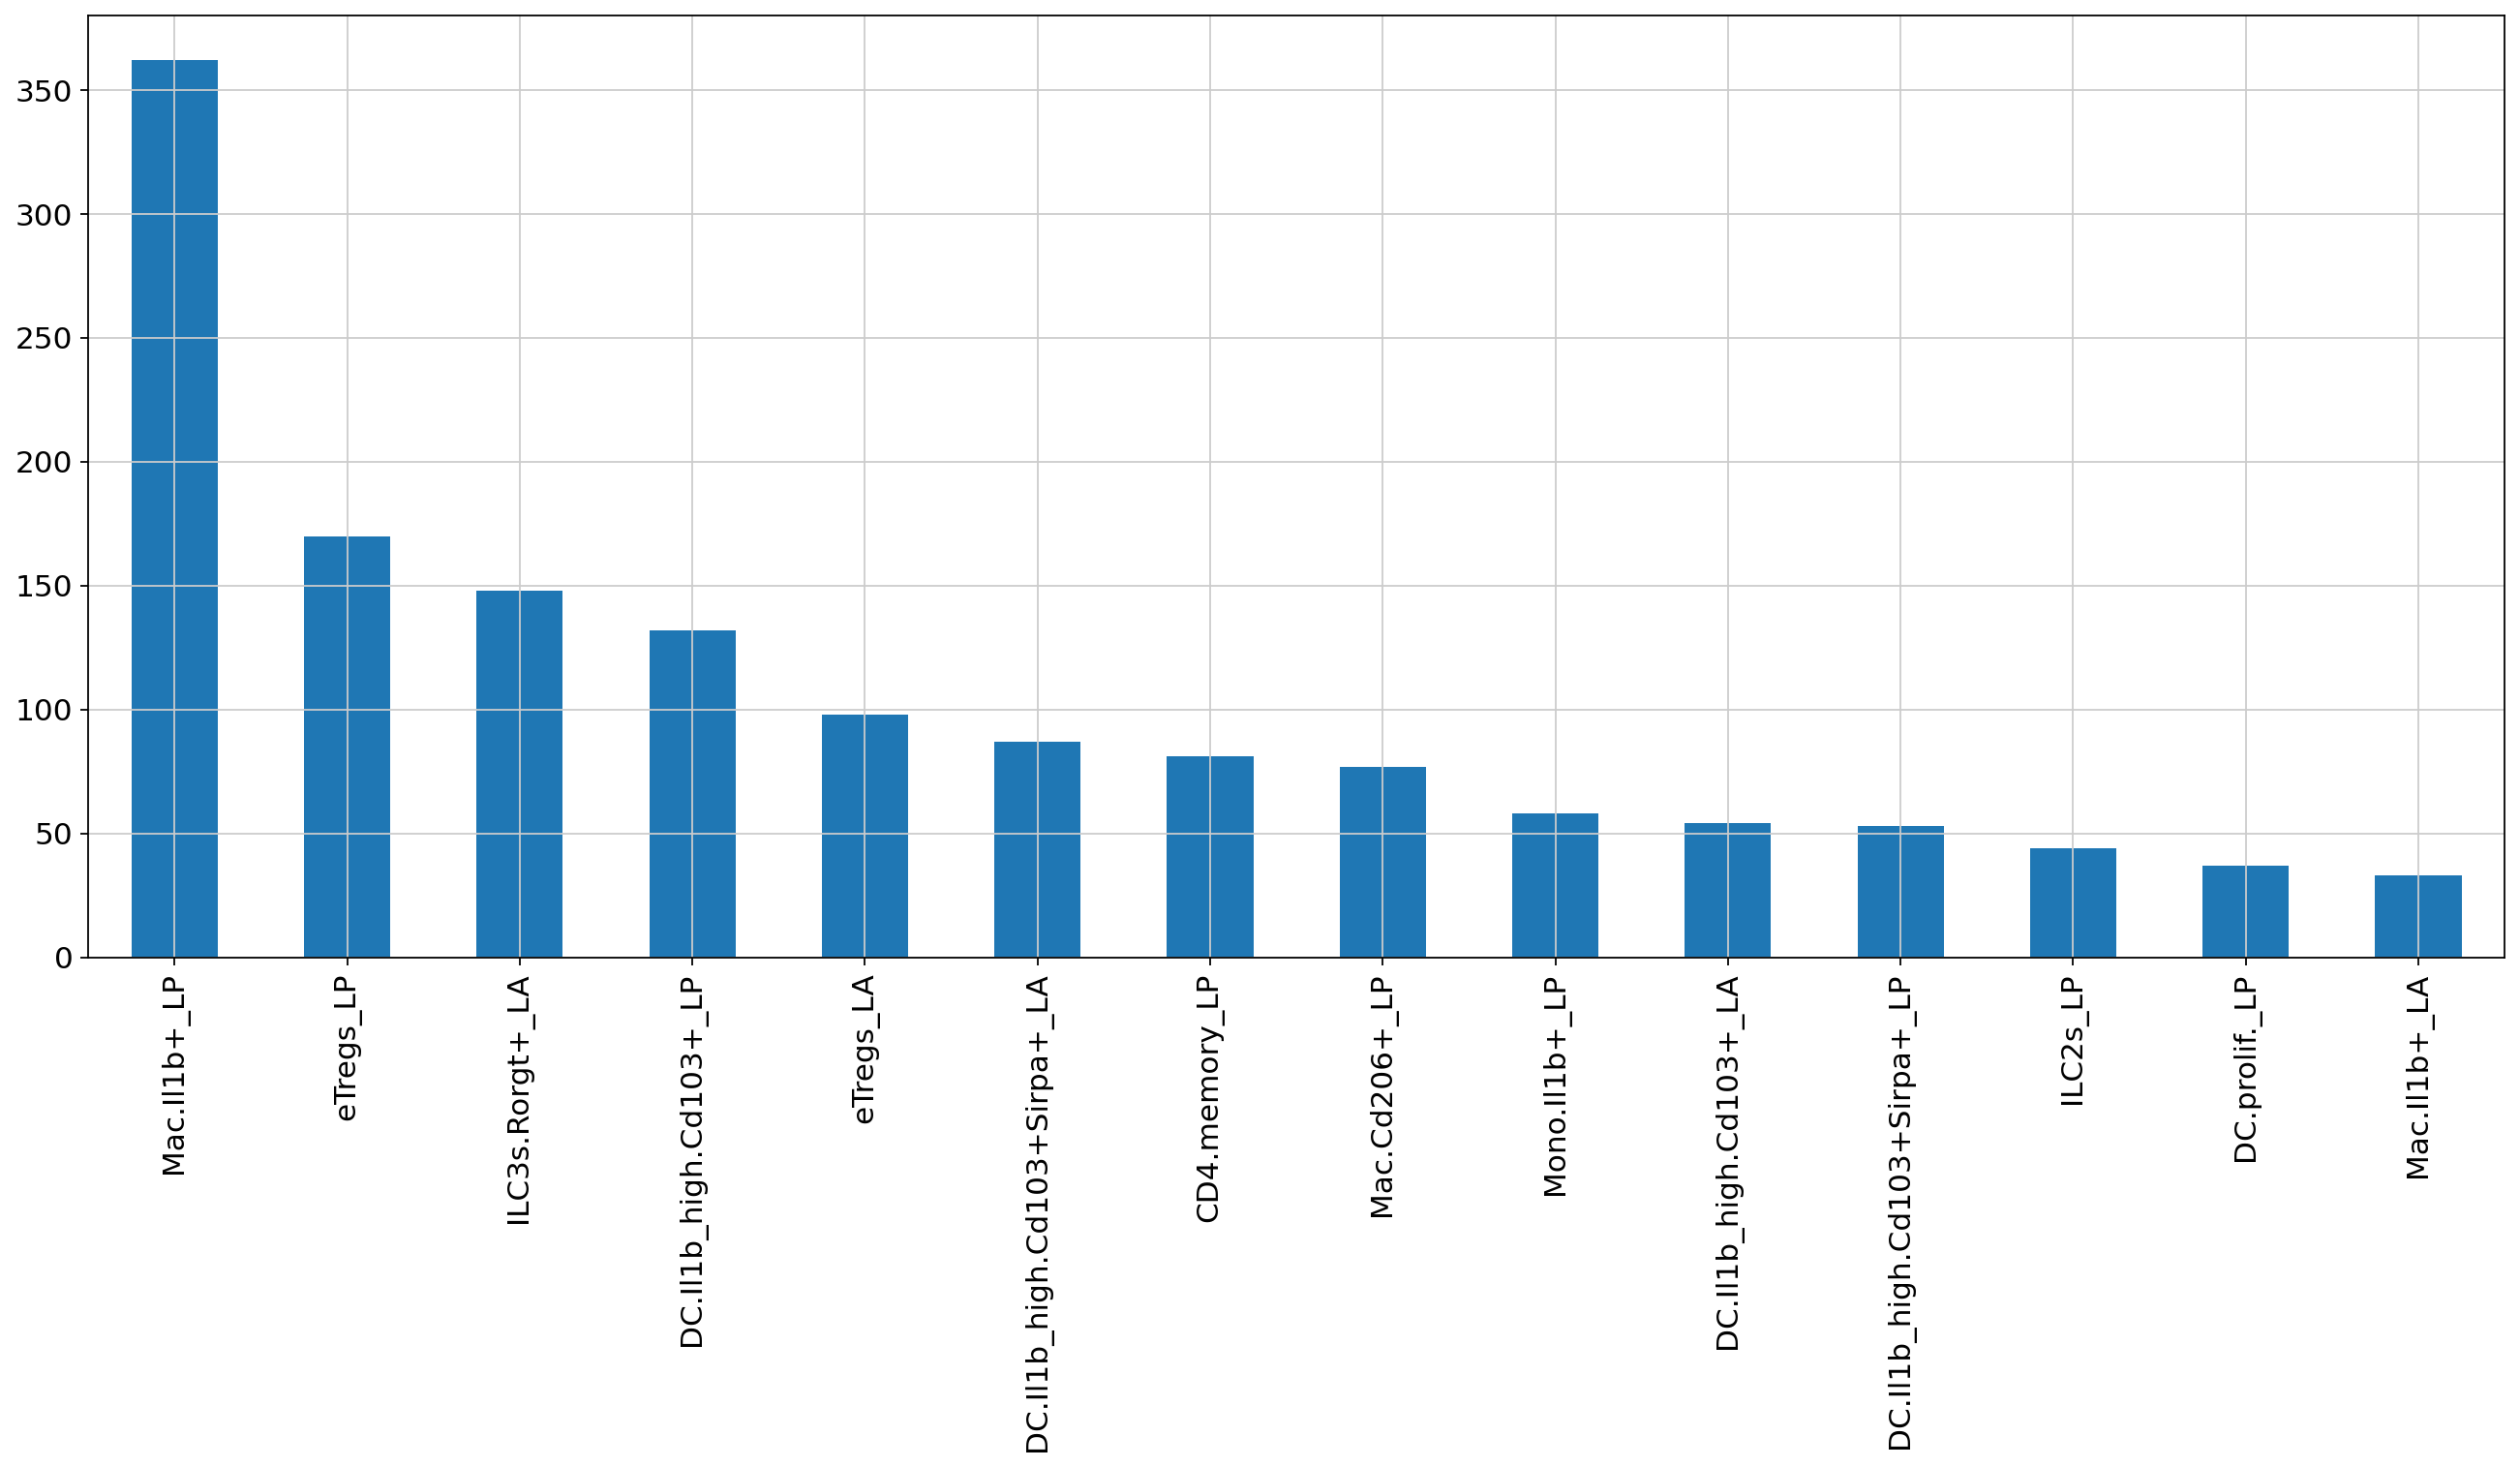

In [141]:
adata_fTCsMye_LA_LP.obs['cellsubsetLoc'].value_counts().plot(kind='bar', figsize=(20,8))

In [136]:
filtered_pop=adata_fTCsMye_LA_LP.obs['final_annotation'].value_counts()
filtered_pop.index

CategoricalIndex(['Mac.Il1b+', 'eTregs', 'DC.Il1b_high.Cd103+', 'ILC3s.Rorgt+',
                  'DC.Il1b_high.Cd103+Sirpa+', 'CD4.memory', 'Mac.Cd206+',
                  'Mono.Il1b+', 'ILC2s', 'DC.prolif.'],
                 categories=['CD4.memory', 'DC.Il1b_high.Cd103+', 'DC.Il1b_high.Cd103+Sirpa+', 'DC.prolif.', 'ILC2s', 'ILC3s.Rorgt+', 'Mac.Cd206+', 'Mac.Il1b+', ...], ordered=False, dtype='category')

In [121]:
adata_fTCsMye_LA_LP.uns['final_annotation_colors']

array(['#d33f6aff', '#bec1d4ff', '#d6bcc0ff', '#4a6fe3ff', '#e377c2ff',
       '#bcbd22ff', '#fdae61ff', '#fee0b6ff', '#f46d43ff', '#4a6fe3ff'],
      dtype='<U9')

In [130]:
tmp3

location                         LA        LP       LPm       LAm        FC
final_annotation                                                           
DC1.Cd8+Xcr1+              1.000000  0.000000  0.010000  1.010000 -6.658211
DC.Il1b_high.Cd103+        0.290323  0.709677  0.719677  0.300323  1.260837
DC.Il1b_high.Cd103+Sirpa+  0.621429  0.378571  0.388571  0.631429 -0.700440
DC.prolif.                 0.244898  0.755102  0.765102  0.254898  1.585732
Lymph.DC.Cd8+              0.500000  0.500000  0.510000  0.510000  0.000000
Lymph.DC.Sirpa+            1.000000  0.000000  0.010000  1.010000 -6.658211
Mac.Cd206+                 0.114943  0.885057  0.895057  0.124943  2.840716
Mac.Il1b+                  0.083544  0.916456  0.926456  0.093544  3.308000
Mono.Il1b+                 0.033333  0.966667  0.976667  0.043333  4.494317
Mono.Sirpa+                0.600000  0.400000  0.410000  0.610000 -0.573185
CD4.memory                 0.198020  0.801980  0.811980  0.208020  1.964724
ILC2s                      0.169811  0.830189  0.840189  0.179811  2.224229
ILC3s.Rorgt+               0.973684  0.026316  0.036316  0.983684 -4.759526
ILC3s.Rorgt+.MHCIIhi       1.000000  0.000000  0.010000  1.010000 -6.658211
LTi-like.ILC3s             0.750000  0.250000  0.260000  0.760000 -1.547488
NK-NKT-gdTCs               0.285714  0.714286  0.724286  0.295714  1.292355
Naïve.CD4+CD8+             1.000000  0.000000  0.010000  1.010000 -6.658211
Naïve.CD8+.pop2            1.000000  0.000000  0.010000  1.010000 -6.658211
Prolif-Tregs               0.459459  0.540541  0.550541  0.469459  0.229848
Th17                       0.333333  0.666667  0.676667  0.343333  0.978835
cTregs                     0.833333  0.166667  0.176667  0.843333 -2.255073
eTregs                     0.365672  0.634328  0.644328  0.375672  0.778324
gdTCs.Th17                 0.200000  0.800000  0.810000  0.210000  1.947533

In [131]:
tmp3.index

Index(['DC1.Cd8+Xcr1+', 'DC.Il1b_high.Cd103+', 'DC.Il1b_high.Cd103+Sirpa+',
       'DC.prolif.', 'Lymph.DC.Cd8+', 'Lymph.DC.Sirpa+', 'Mac.Cd206+',
       'Mac.Il1b+', 'Mono.Il1b+', 'Mono.Sirpa+', 'CD4.memory', 'ILC2s',
       'ILC3s.Rorgt+', 'ILC3s.Rorgt+.MHCIIhi', 'LTi-like.ILC3s',
       'NK-NKT-gdTCs', 'Naïve.CD4+CD8+', 'Naïve.CD8+.pop2', 'Prolif-Tregs',
       'Th17', 'cTregs', 'eTregs', 'gdTCs.Th17'],
      dtype='object', name='final_annotation')

In [142]:
tmp4 = tmp3.drop(index=filtered_pop.index)

In [144]:
tmp4=tmp3.loc[tmp3.index.isin(filtered_pop.index)]

In [145]:
tmp4

location                         LA        LP       LPm       LAm        FC
final_annotation                                                           
DC.Il1b_high.Cd103+        0.290323  0.709677  0.719677  0.300323  1.260837
DC.Il1b_high.Cd103+Sirpa+  0.621429  0.378571  0.388571  0.631429 -0.700440
DC.prolif.                 0.244898  0.755102  0.765102  0.254898  1.585732
Mac.Cd206+                 0.114943  0.885057  0.895057  0.124943  2.840716
Mac.Il1b+                  0.083544  0.916456  0.926456  0.093544  3.308000
Mono.Il1b+                 0.033333  0.966667  0.976667  0.043333  4.494317
CD4.memory                 0.198020  0.801980  0.811980  0.208020  1.964724
ILC2s                      0.169811  0.830189  0.840189  0.179811  2.224229
ILC3s.Rorgt+               0.973684  0.026316  0.036316  0.983684 -4.759526
eTregs                     0.365672  0.634328  0.644328  0.375672  0.778324

In [146]:
dict(zip(adata_fTCsMye_LA_LP.obs['final_annotation'].cat.categories, adata_fTCsMye_LA_LP.uns[f"{'final_annotation'}_colors"]))

{'CD4.memory': '#d33f6aff',
 'DC.Il1b_high.Cd103+': '#bec1d4ff',
 'DC.Il1b_high.Cd103+Sirpa+': '#d6bcc0ff',
 'DC.prolif.': '#4a6fe3ff',
 'ILC2s': '#e377c2ff',
 'ILC3s.Rorgt+': '#bcbd22ff',
 'Mac.Cd206+': '#fdae61ff',
 'Mac.Il1b+': '#fee0b6ff',
 'Mono.Il1b+': '#f46d43ff',
 'eTregs': '#4a6fe3ff'}

In [149]:
color_list2=['#bec1d4ff','#d6bcc0ff','#4a6fe3ff','#fdae61ff','#fee0b6ff','#f46d43ff','#d33f6aff','#e377c2ff','#bcbd22ff', '#4a6fe3ff']

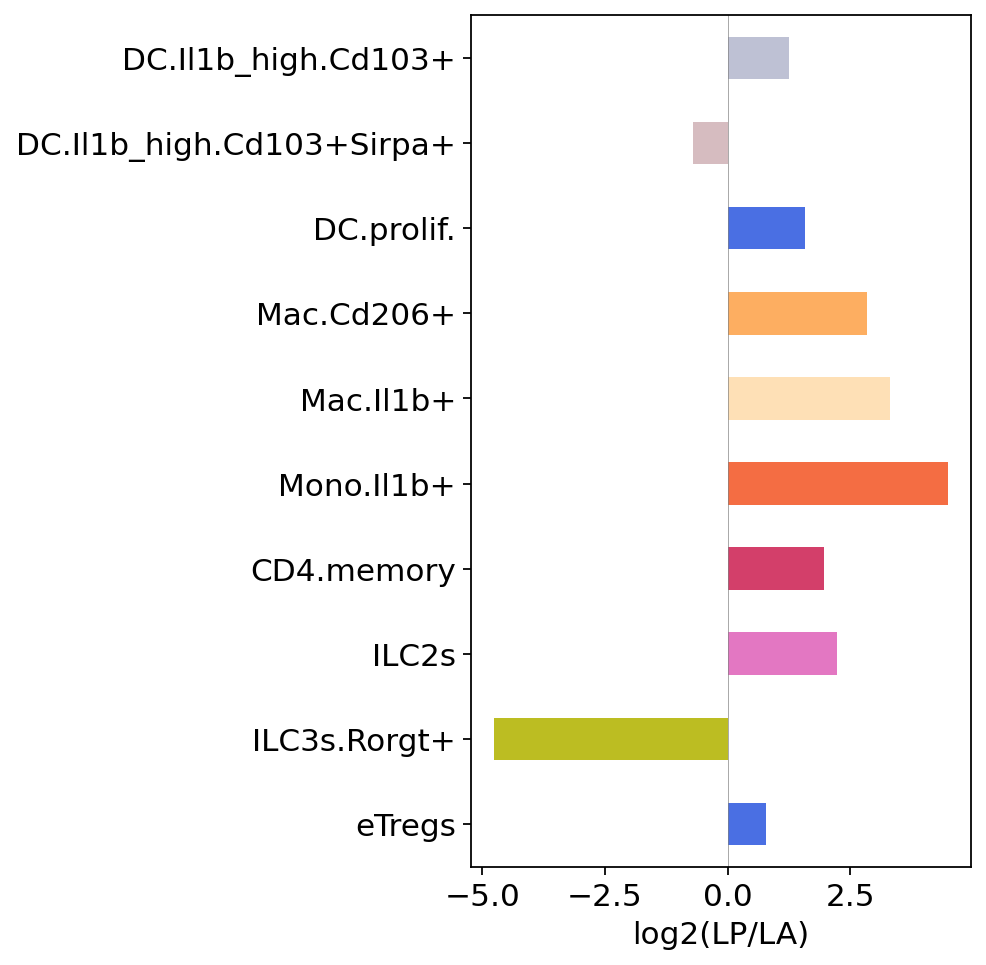

In [150]:
with mpl.rc_context({'figure.figsize': (4, 7)}):
    fig, ax = mpl.subplots()

    tmp4['FC'].plot(kind='barh',ax=ax,figsize=(4,7),color=color_list2 ,grid=False)

    ax.axvline(0, color='grey', linewidth=0.3)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('log2(LP/LA)')
    ax.set_ylabel('')
mpl.savefig('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/figures/LogFC_Mye-TCs_filtered.pdf', format='pdf')

## MHC-II Score

In [113]:
adata_fTCsMye_LA =adata_fTCsMye[adata_fTCsMye.obs["location"].isin(['LA'])]

In [114]:
adata_fTCsMye_LA.uns['final_annotation_colors']

array(['#bec1d4ff', '#d6bcc0ff', '#bcbd22ff', '#fee0b6ff', '#4a6fe3ff'],
      dtype='<U9')

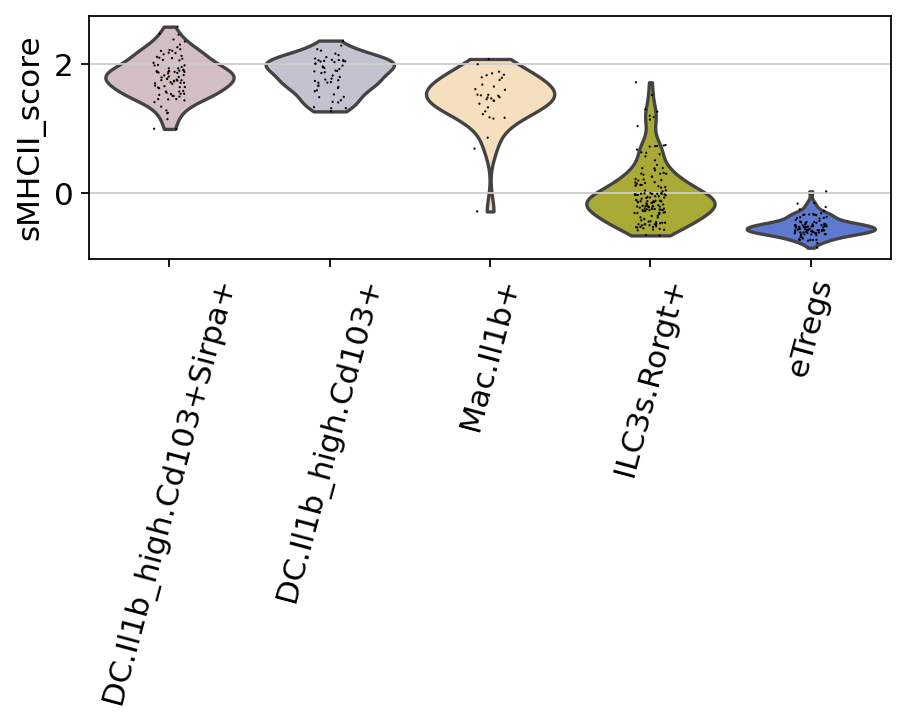

In [178]:
with rc_context({'figure.figsize': (6, 2)}):
    sc.pl.violin(adata_fTCsMye_LA, 'sMHCII_score', order=['DC.Il1b_high.Cd103+Sirpa+','DC.Il1b_high.Cd103+','Mac.Il1b+','ILC3s.Rorgt+','eTregs'], groupby='final_annotation',rotation=75, save='sMHCII_LA_2.pdf')

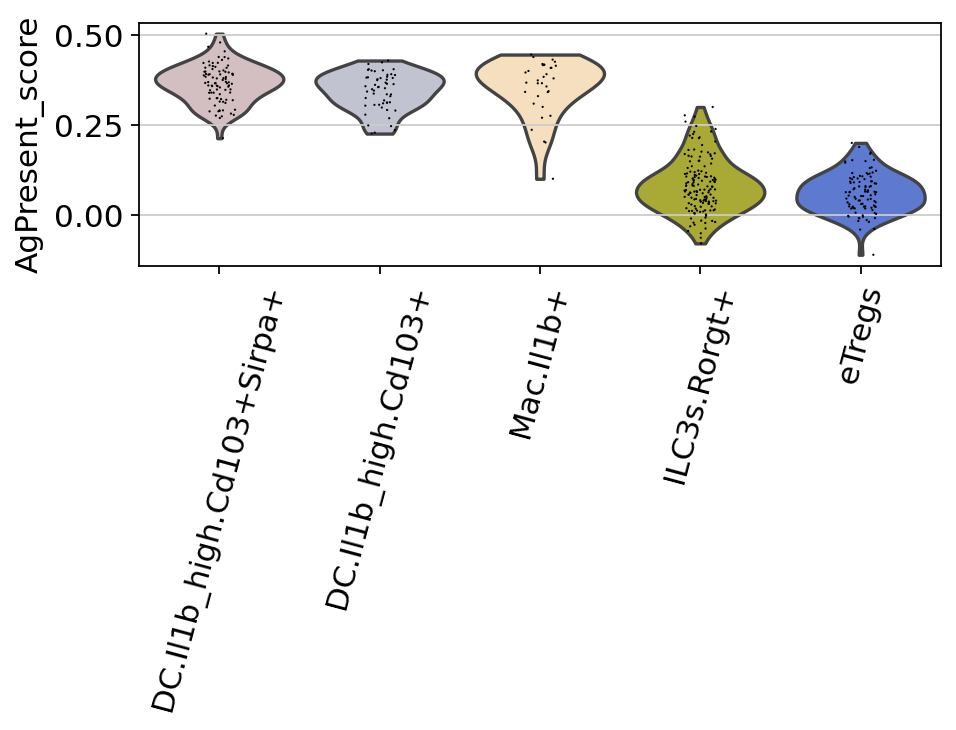

In [180]:
with rc_context({'figure.figsize': (6, 2)}):
    sc.pl.violin(adata_fTCsMye_LA, 'AgPresent_score', order=['DC.Il1b_high.Cd103+Sirpa+','DC.Il1b_high.Cd103+','Mac.Il1b+','ILC3s.Rorgt+','eTregs'],groupby='final_annotation',rotation=75, save='AgPresent_LA_2.pdf')

In [182]:
adata_fTCsMye_LP =adata_fTCsMye[adata_fTCsMye.obs["location"].isin(['LP'])]

In [183]:
adata_fTCsMye_LP.obs['final_annotation'].value_counts()

Mac.Il1b+                    362
eTregs                       170
DC.Il1b_high.Cd103+          132
CD4.memory                    81
Mac.Cd206+                    77
Mono.Il1b+                    58
DC.Il1b_high.Cd103+Sirpa+     53
ILC2s                         44
DC.prolif.                    37
Name: final_annotation, dtype: int64

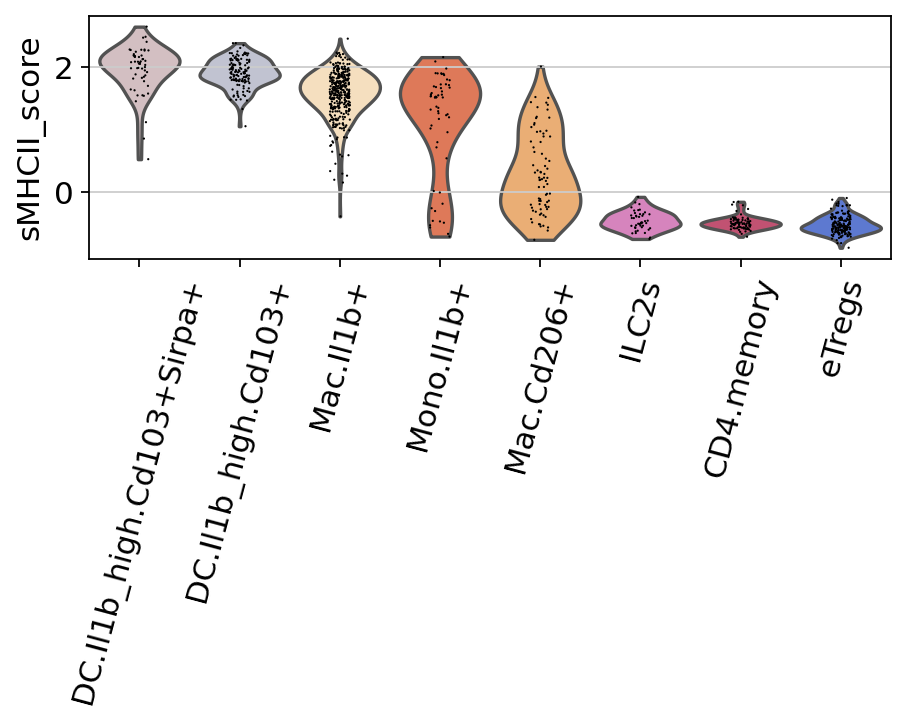

In [184]:
with rc_context({'figure.figsize': (6, 2)}):
    sc.pl.violin(adata_fTCsMye_LP, 'sMHCII_score', order=['DC.Il1b_high.Cd103+Sirpa+','DC.Il1b_high.Cd103+','Mac.Il1b+','Mono.Il1b+','Mac.Cd206+','ILC2s','eTregs','CD4.memory'],
                 groupby='final_annotation',rotation=75, save='sMHCII_LP_2.pdf')

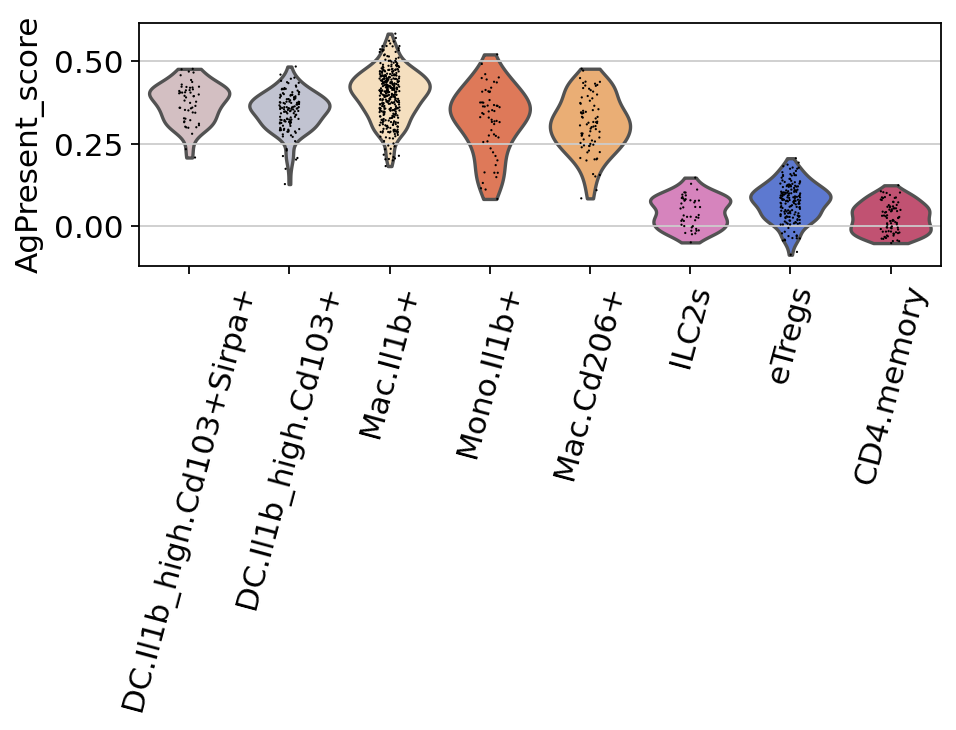

In [187]:
with rc_context({'figure.figsize': (6, 2)}):
    sc.pl.violin(adata_fTCsMye_LP, 'AgPresent_score', order=['DC.Il1b_high.Cd103+Sirpa+','DC.Il1b_high.Cd103+','Mac.Il1b+','Mono.Il1b+','Mac.Cd206+','ILC2s','eTregs','CD4.memory'], groupby='final_annotation',rotation=75, save='AgPresent_LP_2.pdf')

In [450]:
adata_TCsMye.write('TCsMye_final.h5ad')

... storing 'cellsubsetLoc_tag' as categorical


## Dotplots - Validation CellPhoneDB

In [4]:
adata=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/final_woDoublets_goodLabels.h5ad')

In [5]:
adata.obs["cell_lineage"].value_counts()

B-PCs           3912
ILCs-T.cells    2698
Myeloid         2693
Mesenchymal     1400
Granulocytes      88
Epithelial        25
Mast cells        15
Name: cell_lineage, dtype: int64

In [6]:
adata.obs["lineage_new"].value_counts()

B-PCs           3912
ILCs-T.cells    2698
Myeloid         2693
Mesenchymal      866
Endothelial      524
Granulocytes      88
Epithelial        25
Mast cells        15
Neural            10
Name: lineage_new, dtype: int64

In [7]:
adata_f = adata[adata.obs['cellsubsetLoc'].map(adata.obs['cellsubsetLoc'].value_counts())>30]

In [8]:
adata_fTCs=adata_f[adata_f.obs["lineage_new"].isin(["ILCs-T.cells"])]

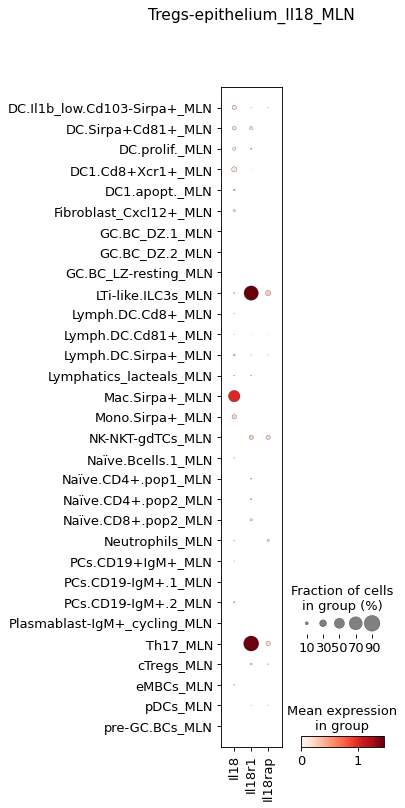

In [24]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['MLN'])], ['Il18','Il18r1','Il18rap'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Tregs-epithelium_Il18_MLN', save='Tregs-epithelium_Il18_MLN.pdf')

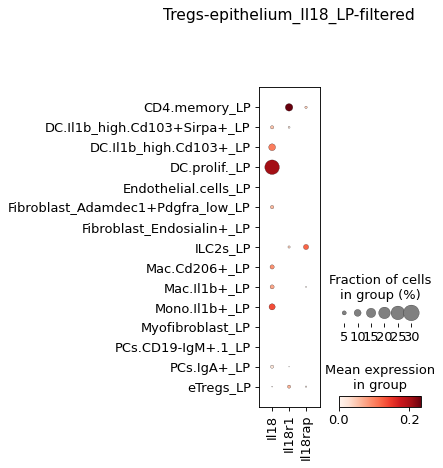

In [25]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['LP'])], ['Il18','Il18r1','Il18rap'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Tregs-epithelium_Il18_LP-filtered', save='Tregs-epithelium_Il18_LP_filtered.pdf')

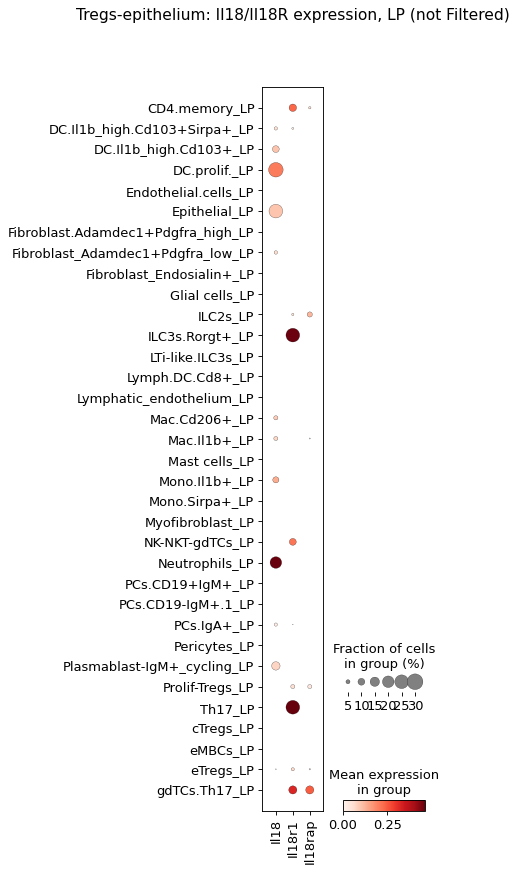

In [26]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata[adata.obs["location"].isin(['LP'])], ['Il18','Il18r1','Il18rap'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Tregs-epithelium: Il18/Il18R expression, LP (not Filtered)', save='Tregs-epithelium_Il18_LP_notFilt.pdf')

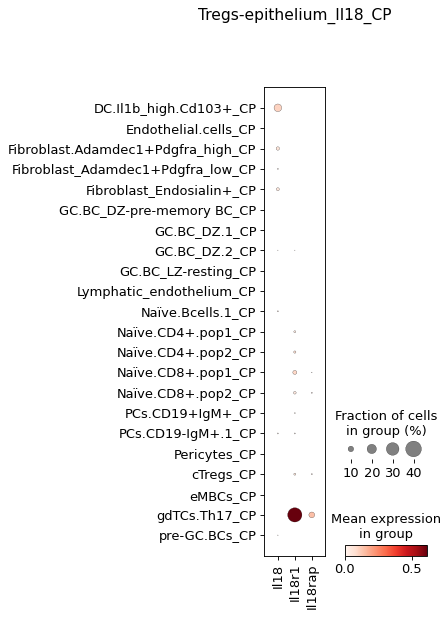

In [27]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['CP'])], ['Il18','Il18r1','Il18rap'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Tregs-epithelium_Il18_CP', save='Tregs-epithelium_Il18_CP.pdf')

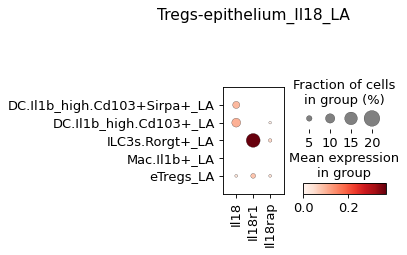

In [28]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['LA'])], ['Il18','Il18r1','Il18rap'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Tregs-epithelium_Il18_LA', save='Tregs-epithelium_Il18_LA.pdf')

In [8]:
adata_fTCsMye=adata_f[adata_f.obs["lineage_new"].isin(['Myeloid',"ILCs-T.cells"])]

In [9]:
adata_fTCsMye.obs["lineage_new"].value_counts()

Myeloid         2481
ILCs-T.cells    2281
Name: lineage_new, dtype: int64

In [10]:
adata_tTCsMye=adata_fTCsMye[adata_fTCsMye.obs["location"].isin(['LA','LP'])]

<AxesSubplot:>

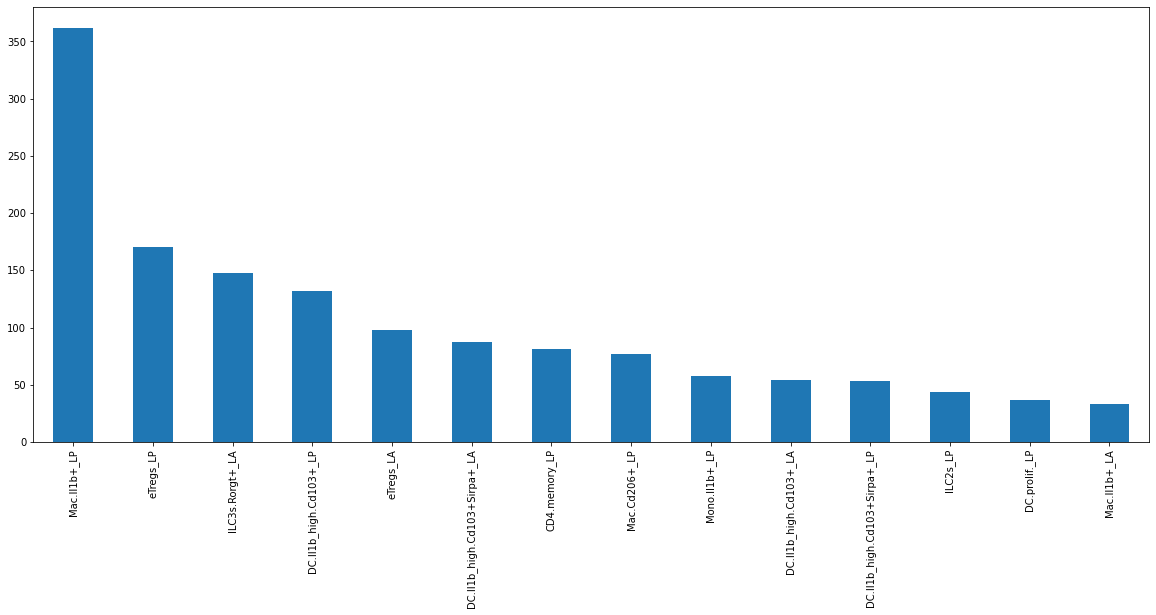

In [11]:
adata_tTCsMye.obs['cellsubsetLoc'].value_counts().plot(kind='bar', figsize=(20,8))

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cellsubsetLoc']`


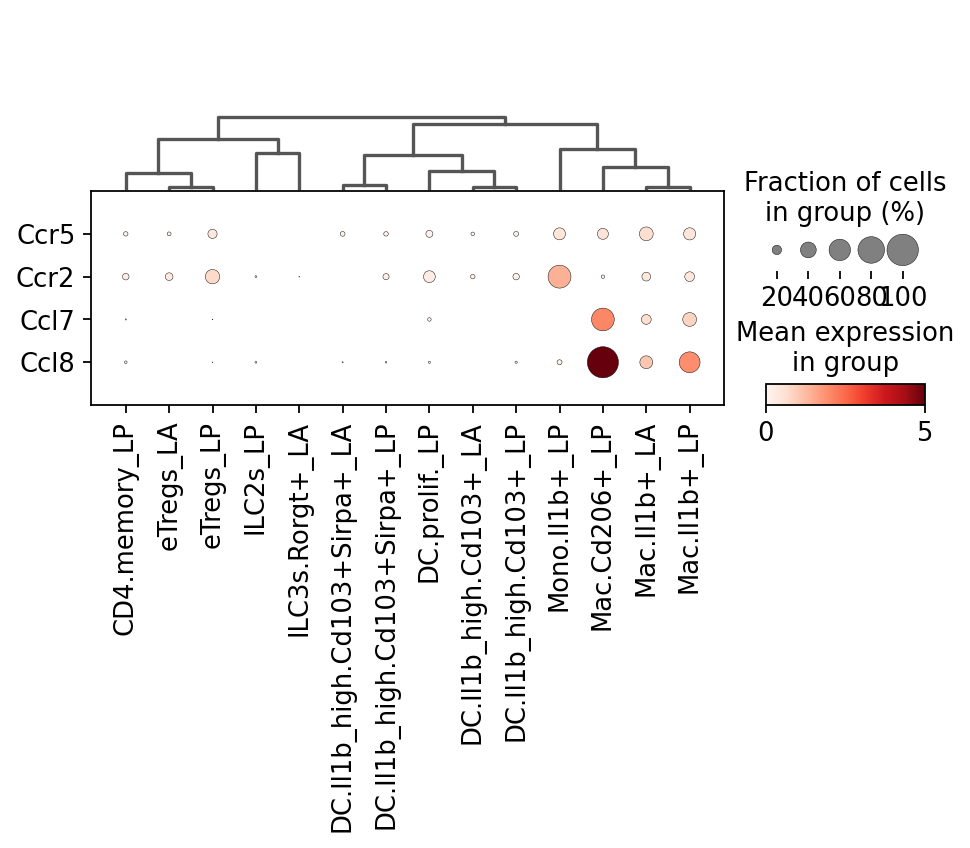

In [155]:
sc.tl.dendrogram(adata_fTCsMye_LA_LP, groupby='cellsubsetLoc')
sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Ccr5','Ccr2','Ccl7','Ccl8'] , groupby='cellsubsetLoc', dendrogram=True,swap_axes=True, save='fTCs-Mye-CCR5.CCR2-CCL7.CCL8_dotplot.pdf')

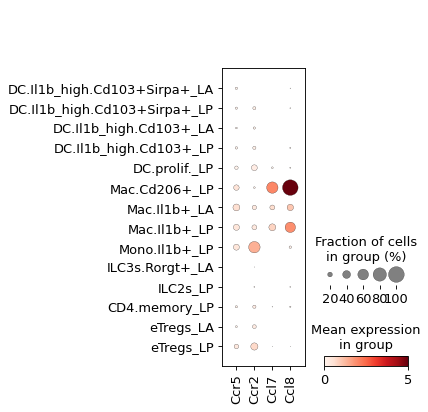

In [65]:
#sc.tl.dendrogram(adata_tTCsMye, groupby='cellsubsetLoc')
sc.pl.dotplot(adata_tTCsMye, ['Ccr5','Ccr2','Ccl7','Ccl8'] , groupby='cellsubsetLoc', var_group_labels="location",dendrogram=False,swap_axes=False, 
              categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],
                 save='fTCs-Mye-CCR5.CCR2-CCL7.CCL8_vertical.pdf')


In [12]:
adata_fTregs = adata_f[adata_f.obs["final_annotation"].isin(['eTregs','cTregs','Prolif-Tregs'])]

In [13]:
adata_fTregs.obs["cellsubsetLoc"].value_counts()

eTregs_LP     170
cTregs_MLN    162
eTregs_LA      98
cTregs_CP      78
Name: cellsubsetLoc, dtype: int64

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cellsubsetLoc']`


Trying to set attribute `._uns` of view, copying.


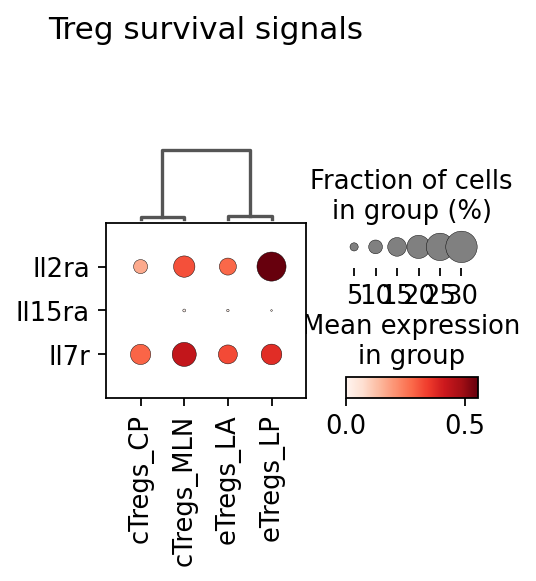

In [205]:
sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTregs[adata_fTregs.obs["location"].isin(['MLN', 'CP','LA','LP'])], ['Il2ra','Il15ra','Il7r'], groupby='cellsubsetLoc', dendrogram=True, swap_axes=True, title='Treg survival signals', save='Treg_survival_signals_2.pdf')

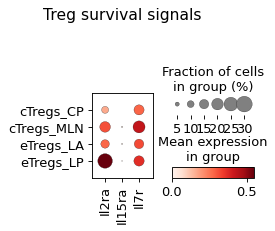

In [68]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTregs[adata_fTregs.obs["location"].isin(['MLN', 'CP','LA','LP'])], ['Il2ra','Il15ra','Il7r'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Treg survival signals', save='Treg_survival_signals_vertical.pdf')

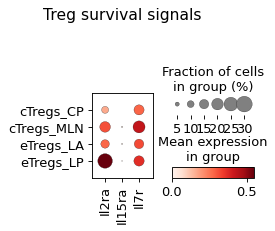

In [68]:
#sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTregs[adata_fTregs.obs["location"].isin(['MLN', 'CP','LA','LP'])], ['Il2ra','Il15ra','Il7r','Il18r'], groupby='cellsubsetLoc', dendrogram=False, swap_axes=False, 
                  title='Treg survival signals', save='Treg_survival_signals_vertical.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cellsubsetLoc']`


Trying to set attribute `._uns` of view, copying.


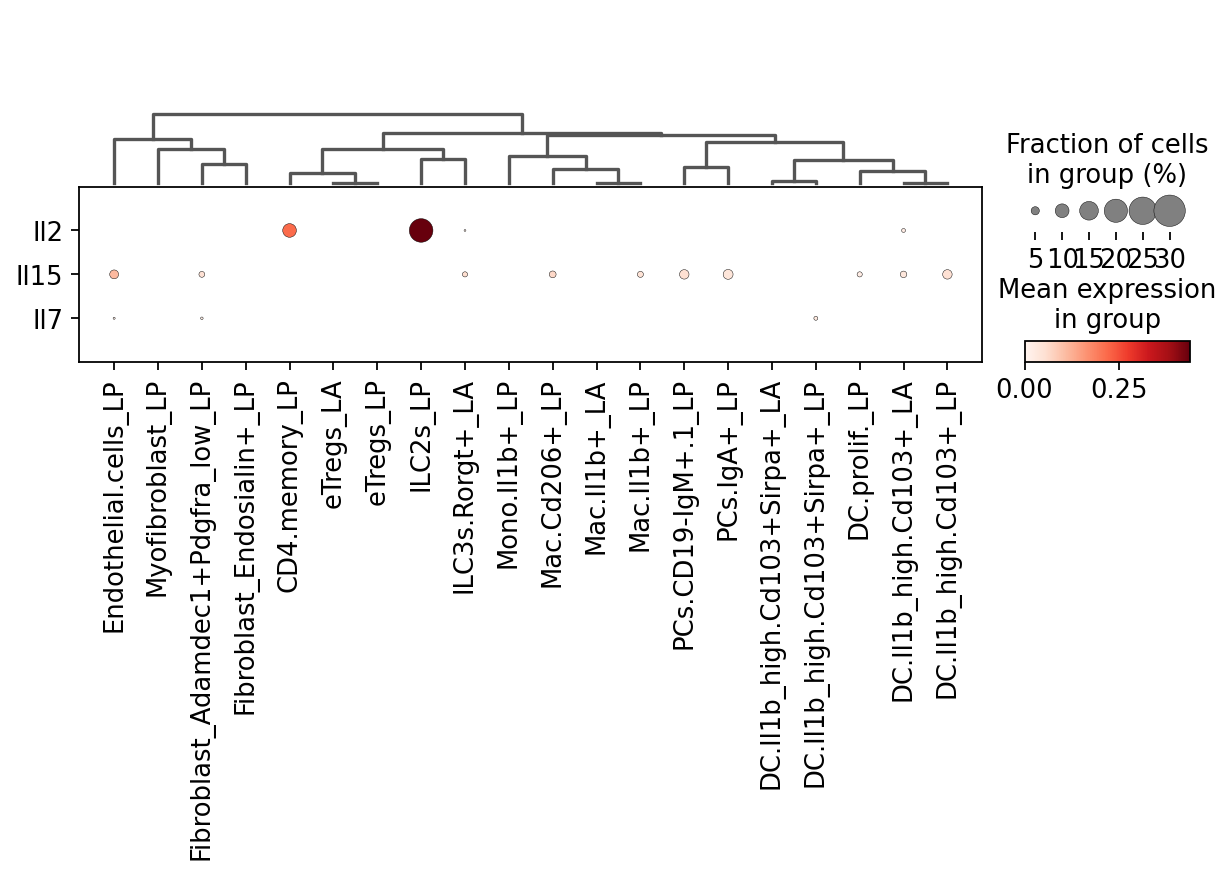

In [172]:
with mpl.rc_context({'figure.figsize': (20, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['LA','LP'])], ['Il2','Il15', 'Il7'] , groupby='cellsubsetLoc', dendrogram=True, swap_axes=True, save='CytokinesExp_allCelltypes_filt_LP-LA.pdf')

In [70]:
adata_f[adata_f.obs["location"].isin(['LA','LP'])].obs['cellsubsetLoc'].value_counts()

PCs.IgA+_LP                          499
Fibroblast_Adamdec1+Pdgfra_low_LP    377
Mac.Il1b+_LP                         362
eTregs_LP                            170
ILC3s.Rorgt+_LA                      148
DC.Il1b_high.Cd103+_LP               132
Endothelial.cells_LP                 126
eTregs_LA                             98
DC.Il1b_high.Cd103+Sirpa+_LA          87
CD4.memory_LP                         81
Mac.Cd206+_LP                         77
Mono.Il1b+_LP                         58
Myofibroblast_LP                      54
DC.Il1b_high.Cd103+_LA                54
DC.Il1b_high.Cd103+Sirpa+_LP          53
Fibroblast_Endosialin+_LP             47
ILC2s_LP                              44
DC.prolif._LP                         37
Mac.Il1b+_LA                          33
PCs.CD19-IgM+.1_LP                    33
Name: cellsubsetLoc, dtype: int64

In [73]:
cat_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP',
                                'PCs.CD19-IgM+.1_LP', 'PCs.IgA+_LP','Endothelial.cells_LP', 'Myofibroblast_LP','Fibroblast_Adamdec1+Pdgfra_low_LP', 'Fibroblast_Endosialin+_LP']

In [74]:
cat_order

['DC.Il1b_high.Cd103+Sirpa+_LA',
 'DC.Il1b_high.Cd103+Sirpa+_LP',
 'DC.Il1b_high.Cd103+_LA',
 'DC.Il1b_high.Cd103+_LP',
 'DC.prolif._LP',
 'Mac.Cd206+_LP',
 'Mac.Il1b+_LA',
 'Mac.Il1b+_LP',
 'Mono.Il1b+_LP',
 'ILC3s.Rorgt+_LA',
 'ILC2s_LP',
 'CD4.memory_LP',
 'eTregs_LA',
 'eTregs_LP',
 'PCs.CD19-IgM+.1_LP',
 'PCs.IgA+_LP',
 'Endothelial.cells_LP',
 'Myofibroblast_LP',
 'Fibroblast_Adamdec1+Pdgfra_low_LP',
 'Fibroblast_Endosialin+_LP']

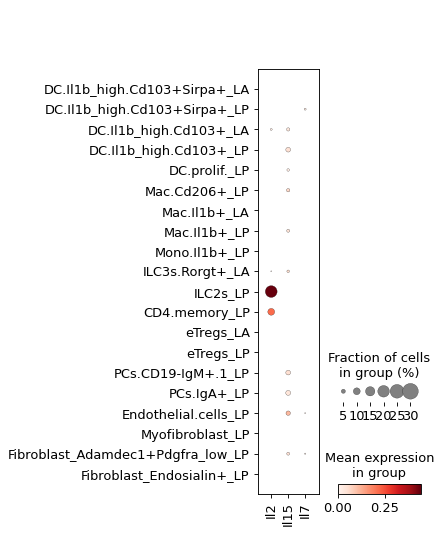

In [76]:
with mpl.rc_context({'figure.figsize': (20, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['LA','LP'])], ['Il2','Il15', 'Il7'] , groupby='cellsubsetLoc', 
                  dendrogram=False, swap_axes=False, categories_order=cat_order,
                  save='CytokinesExp_allCelltypes_filt_LP-LA_vertical.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cellsubsetLoc']`


Trying to set attribute `._uns` of view, copying.


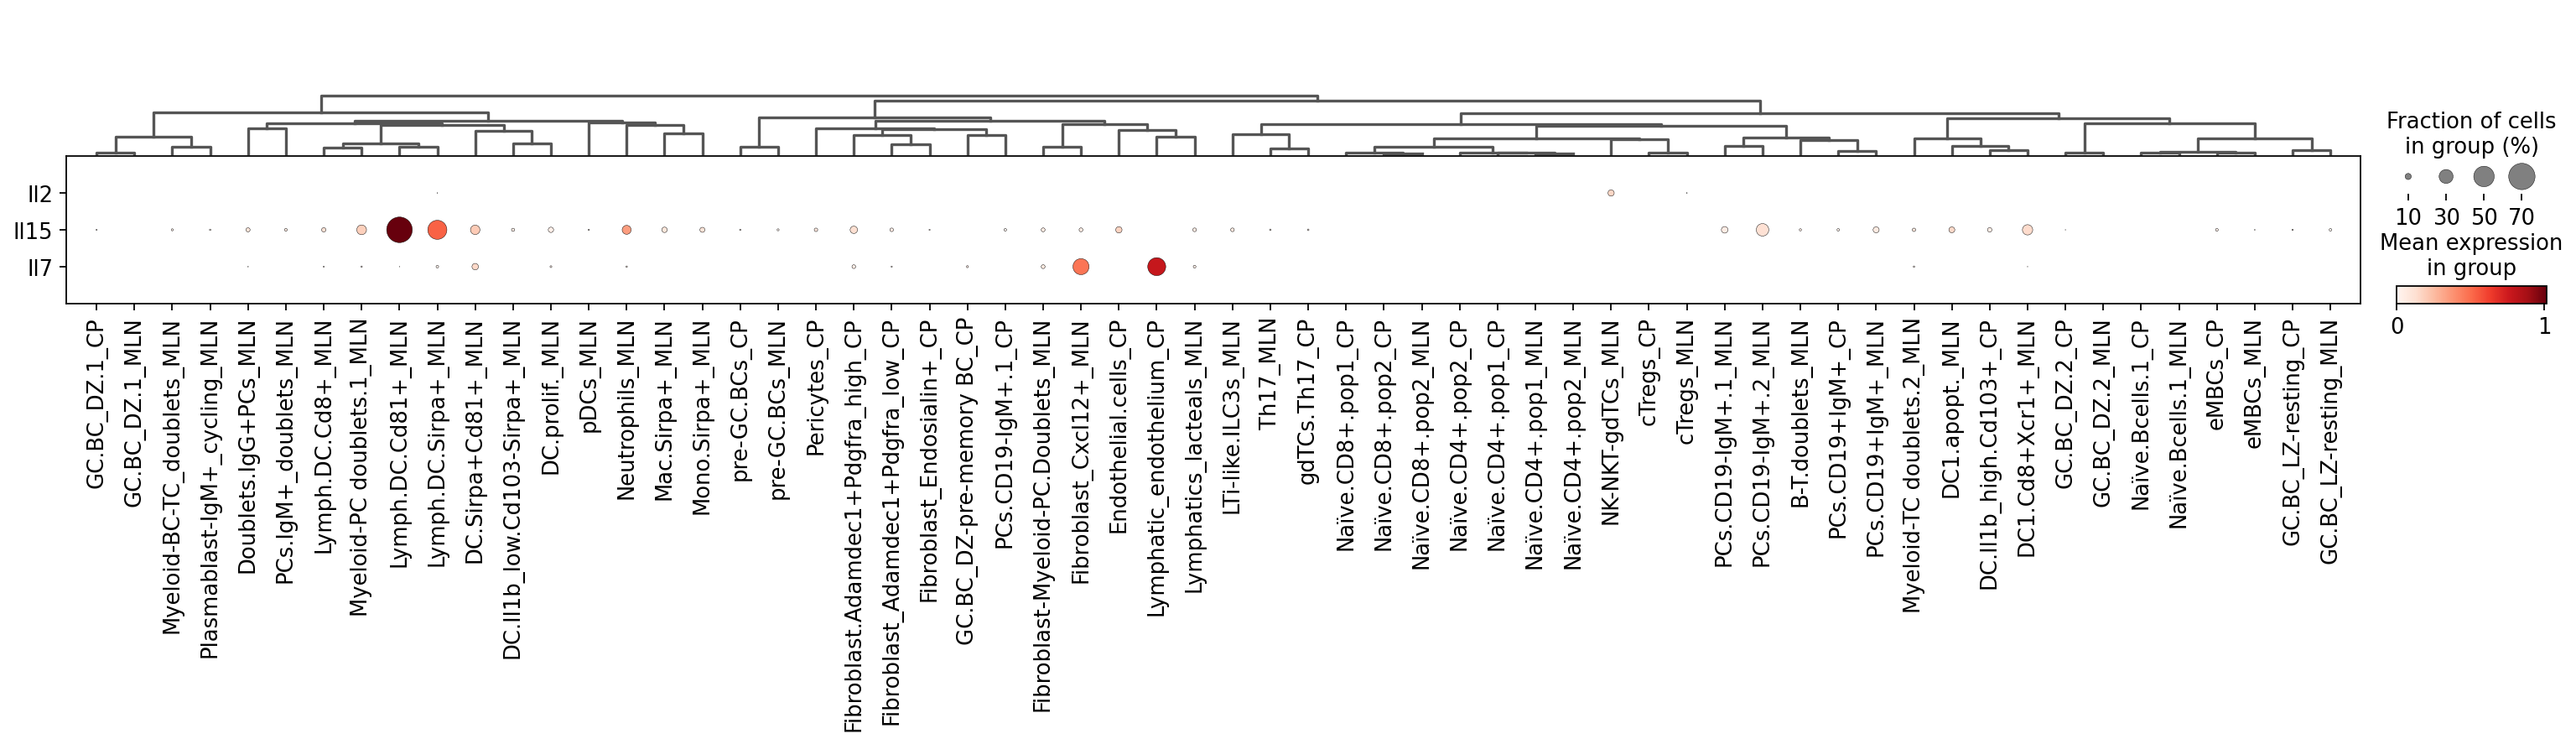

In [173]:
with mpl.rc_context({'figure.figsize': (20, 3)}):
    sc.pl.dotplot(adata_f[adata_f.obs["location"].isin(['MLN', 'CP'])], ['Il2','Il15', 'Il7'] , groupby='cellsubsetLoc', dendrogram=True, swap_axes=True, save='CytokinesExp_allCelltypes_filt_MLN-CP.')

In [ ]:
with rc_context({'figure.figsize': (7, 3)}):
    sc.pl.dotplot(adata_Tregs[adata_Tregs.obs["location"].isin(['3ILF','4LP'])], ['Tgfb1','Itgav', 'Itgb1', 'Itgb3','Itgb5','Itgb6','Itgb8', 'Lrrc32', 'Tgfbr1', 'Tgfbr2', 'Tgfbr3'], groupby='cellsubsetLoc', title='TGFb production and activation - Tregs ILF vs LP', save='TGFb_Tregs_LP-ILF.pdf')

In [ ]:
'CD4.memory': '#d33f6aff',
 'DC.Il1b_high.Cd103+': '#bec1d4ff',
 'DC.Il1b_high.Cd103+Sirpa+': '#d6bcc0ff',
 'DC.prolif.': '#4a6fe3ff',
 'ILC2s': '#e377c2ff',
 'ILC3s.Rorgt+': '#bcbd22ff',
 'Mac.Cd206+': '#fdae61ff',
 'Mac.Il1b+': '#fee0b6ff',
 'Mono.Il1b+': '#f46d43ff',
 'eTregs': '#4a6fe3ff'}

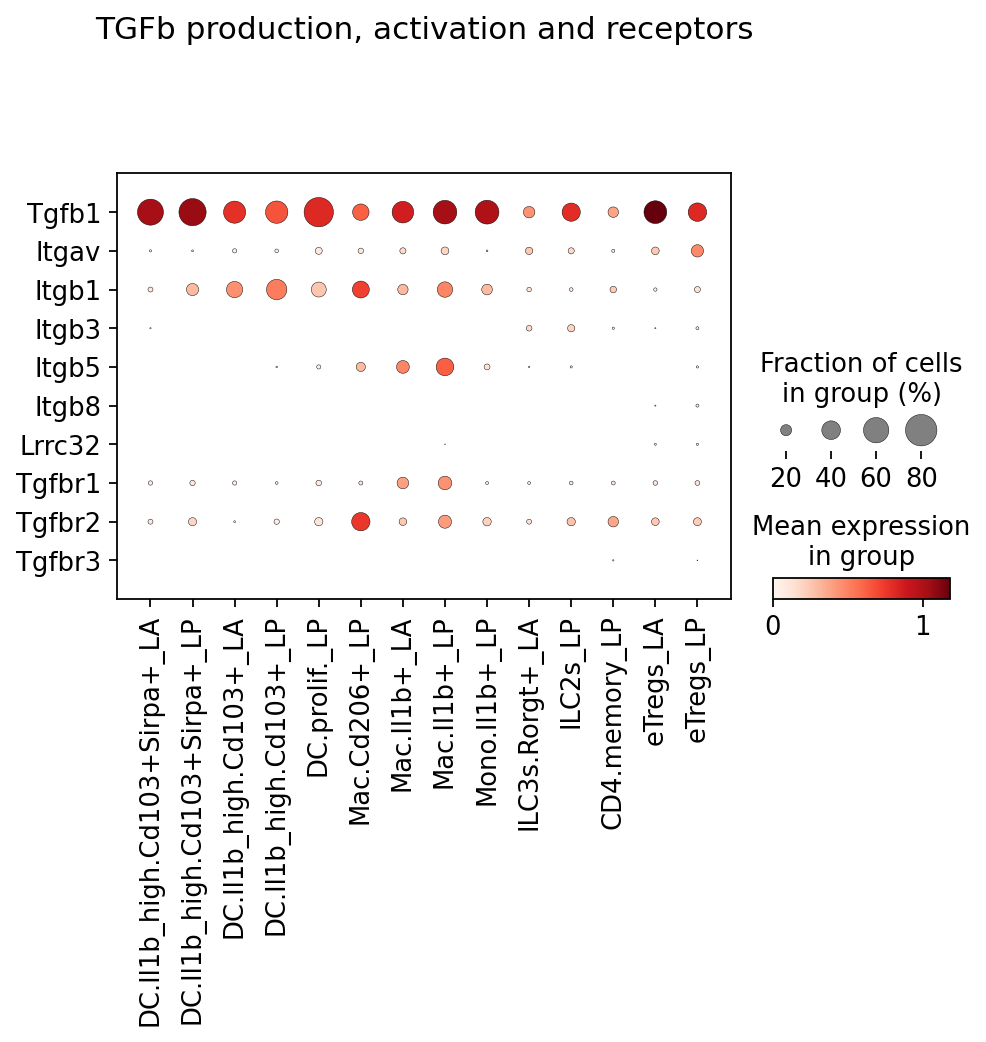

In [196]:
with rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Tgfb1','Itgav', 'Itgb1', 'Itgb3','Itgb5','Itgb8', 'Lrrc32', 'Tgfbr1', 'Tgfbr2', 'Tgfbr3'], categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                                 'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],
                          groupby='cellsubsetLoc', use_raw=True, title='TGFb production, activation and receptors', swap_axes=True, save='TGFb_Mye-TCs_LA-LP_2.pdf')#'Itgb6'

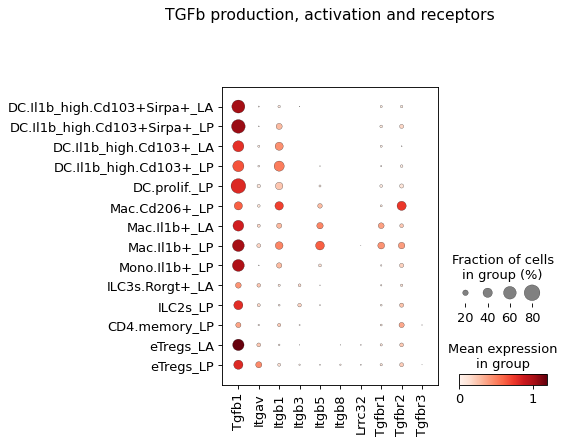

In [77]:
with rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_tTCsMye, ['Tgfb1','Itgav', 'Itgb1', 'Itgb3','Itgb5','Itgb8', 'Lrrc32', 'Tgfbr1', 'Tgfbr2', 'Tgfbr3'], categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                                 'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],
                          groupby='cellsubsetLoc', use_raw=True, title='TGFb production, activation and receptors', swap_axes=False, save='TGFb_Mye-TCs_LA-LP_vertical.pdf')#'Itgb6'

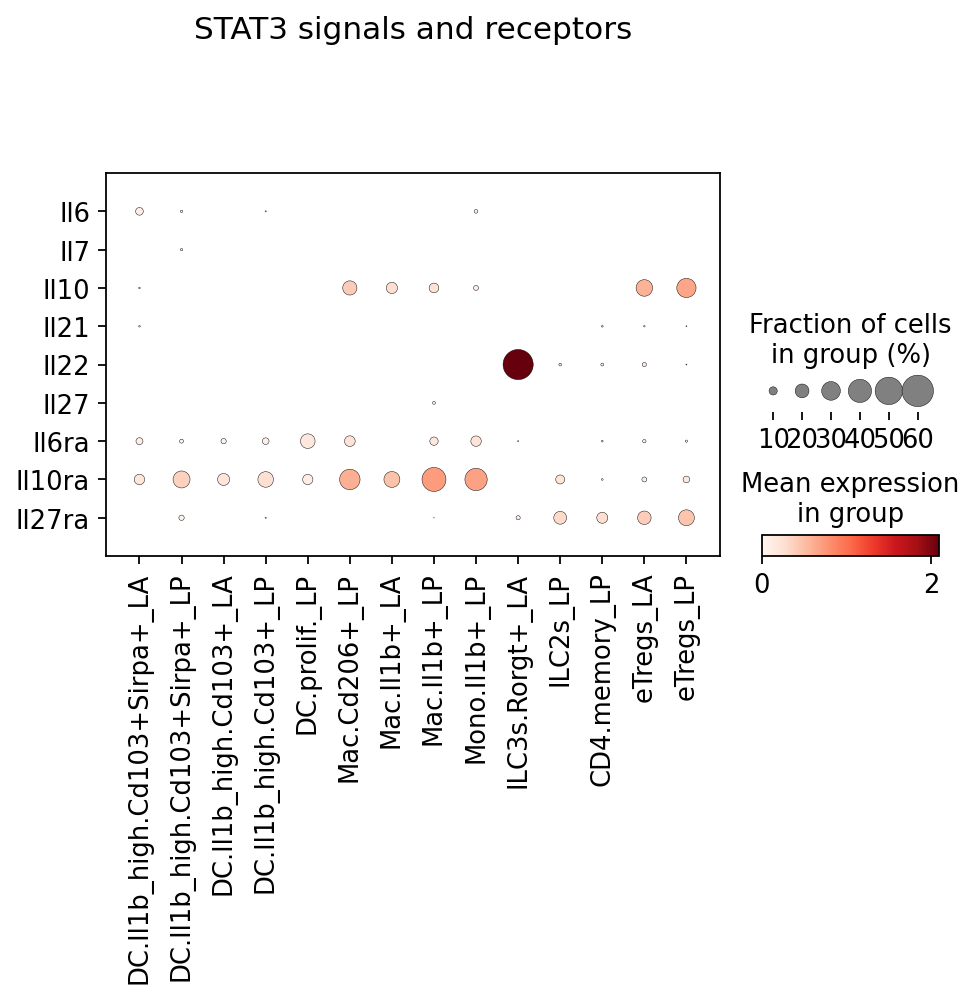

In [198]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Il6', 'Il7', 'Il10', 'Il21','Il22','Il27','Il6ra','Il10ra', 'Il27ra'], categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                                 'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],groupby='cellsubsetLoc', dendrogram=False, 
                  title='STAT3 signals and receptors', use_raw=True, swap_axes=True, save='STAT3signals_andRecept_LA-LP.pdf')

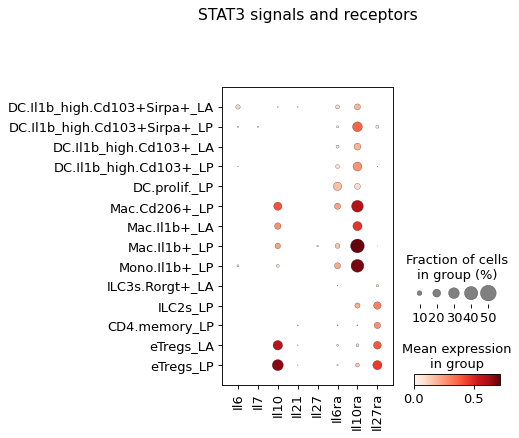

In [79]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_tTCsMye, ['Il6', 'Il7', 'Il10', 'Il21','Il27','Il6ra','Il10ra', 'Il27ra'], categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                                 'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],groupby='cellsubsetLoc', dendrogram=False, 
                  title='STAT3 signals and receptors', use_raw=True, swap_axes=False, save='STAT3signals_andRecept_LA-LP_vertical.pdf')

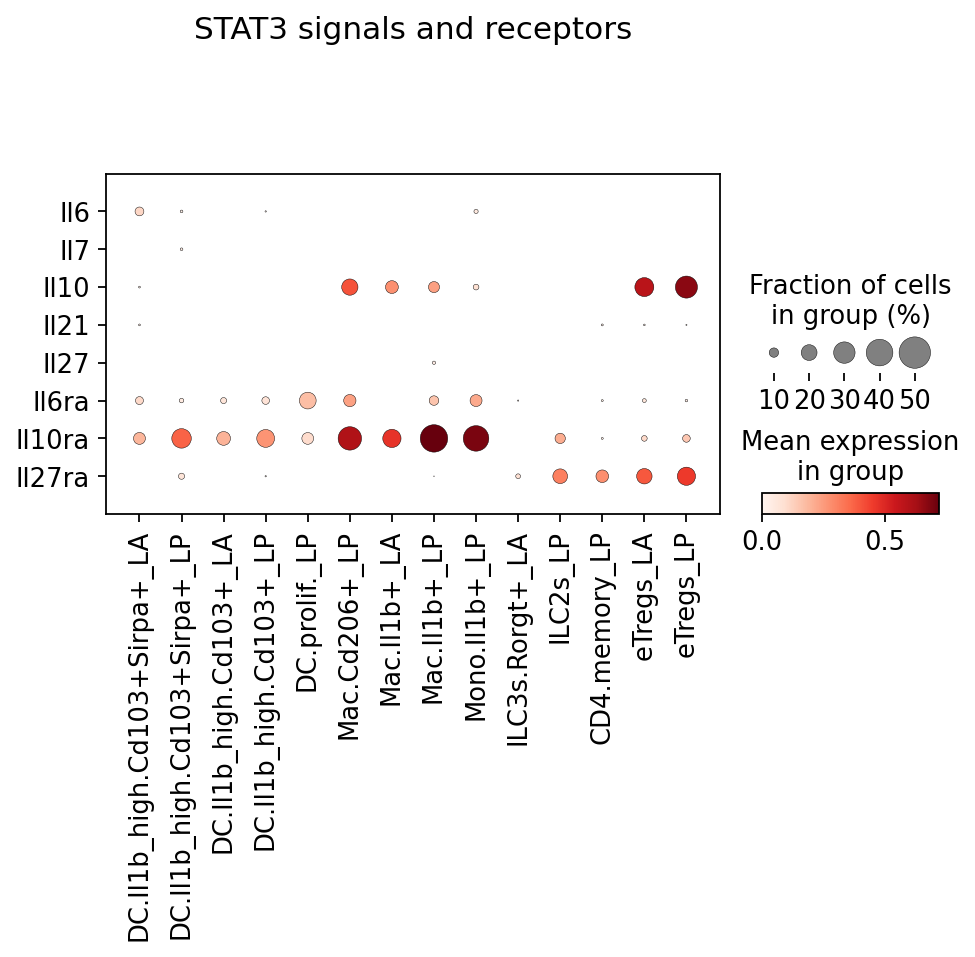

In [202]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Il6', 'Il7', 'Il10', 'Il21','Il27','Il6ra','Il10ra', 'Il27ra'], categories_order=['DC.Il1b_high.Cd103+Sirpa+_LA','DC.Il1b_high.Cd103+Sirpa+_LP','DC.Il1b_high.Cd103+_LA','DC.Il1b_high.Cd103+_LP',
                                                 'DC.prolif._LP','Mac.Cd206+_LP', 'Mac.Il1b+_LA','Mac.Il1b+_LP','Mono.Il1b+_LP','ILC3s.Rorgt+_LA','ILC2s_LP','CD4.memory_LP', 'eTregs_LA','eTregs_LP'],groupby='cellsubsetLoc', dendrogram=False, 
                  title='STAT3 signals and receptors', use_raw=True, swap_axes=True, save='STAT3signals_andRecept_LA-LP_2.pdf')

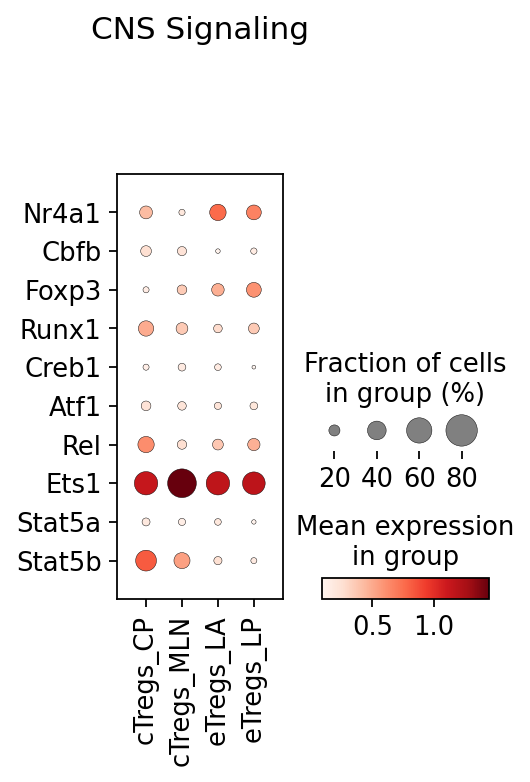

In [214]:
with rc_context({'figure.figsize': (7, 3)}):
    sc.pl.dotplot(adata_fTregs, ['Nr4a1', 'Cbfb', 'Foxp3', 'Runx1', 'Creb1', 'Atf1', 'Rel', 'Ets1', 'Stat5a', 'Stat5b'],
                  groupby='cellsubsetLoc', use_raw=True, swap_axes=True, title='CNS Signaling', save='CNS.signalling_Tregs-all.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cellsubsetLoc']`


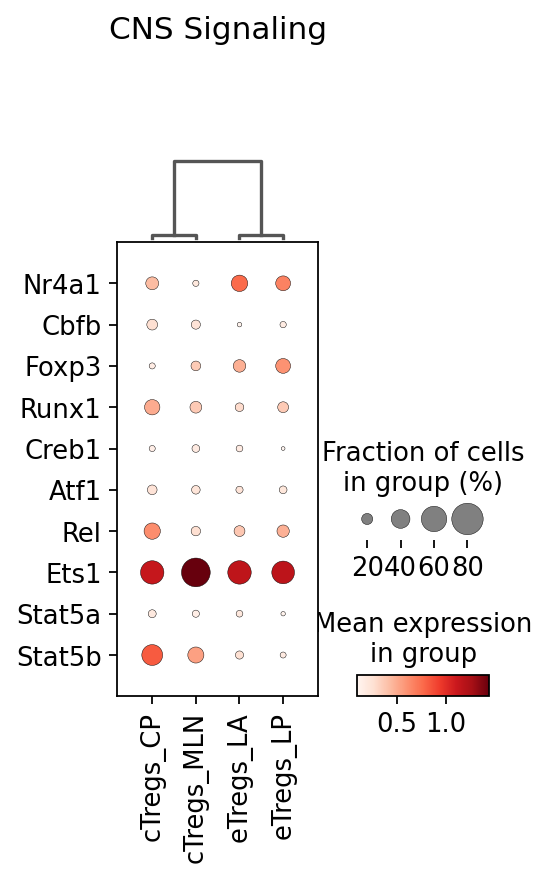

In [215]:
sc.tl.dendrogram(adata_fTregs, groupby='cellsubsetLoc')
with rc_context({'figure.figsize': (7, 3)}):
    sc.pl.dotplot(adata_fTregs, ['Nr4a1', 'Cbfb', 'Foxp3', 'Runx1', 'Creb1', 'Atf1', 'Rel', 'Ets1', 'Stat5a', 'Stat5b'],
                  groupby='cellsubsetLoc', use_raw=True, swap_axes=True, dendrogram=True, title='CNS Signaling', save='CNS.signalling_Tregs-all2.pdf')

# Final names for the integrated object

In [8]:
adata=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/final.h5ad')

In [9]:
adata.obs['final_annotation_old']=adata.obs['final_annotation']

In [7]:
#adata.obs

In [11]:
cellsubset_names_change = {"Naïve.CD4+.pop1": "Naive.CD4+_CP", "Naïve.CD4+.pop2": "Naive.CD4+_MLN",
                           "Naïve.CD8+.pop1": "Naive.CD8+_CP", "Naïve.CD8+.pop2": "Naive.CD8+_MLN",'Naïve.CD4+CD8+':'Naive.CD4+CD8+',
                           "Naïve.Bcells.1": "Naive.Bcells", "Naïve.Bcells.ISGhi": "Naive.Bcells.ISGhi"
                          }
adata.obs['final_annotation'] = [cellsubset_names_change.get(x, x) for x in adata.obs["final_annotation_old"]]

In [12]:
adata.obs['final_annotation'].value_counts()

Naive.Bcells                      645
PCs.CD19-IgM+.1                   574
PCs.IgA+                          535
Naive.CD4+_CP                     473
Fibroblast_Adamdec1+Pdgfra_low    466
                                 ... 
Myeloid-BC_doublets                10
pre-DC                             10
Myeloid-TC-doublets                 7
Epithelial.MHCII+                   7
Fibroblast_Acta2+                   6
Name: final_annotation, Length: 80, dtype: int64

In [13]:
adata

AnnData object with n_obs × n_vars = 11865 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_genes_

In [15]:
adata.obs.rename(columns = {'predicted_labels':'predicted_labels_old', 
                        'over_clustering':'over_clustering_old',
                      'majority_voting':'majority_voting_old',
                       'conf_score':'conf_score_old'}, inplace = True)

In [16]:
adata

AnnData object with n_obs × n_vars = 11865 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_genes_

In [17]:
adata.write('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/final_withDoublets_goodLabels.h5ad')

... storing 'final_annotation' as categorical


In [18]:
adata_clean = adata[~adata.obs["lineage_final"].isin(['doublets'])]

In [19]:
adata_clean

View of AnnData object with n_obs × n_vars = 10831 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', '

In [20]:
adata_clean.write('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/final_woDoublets_goodLabels.h5ad')

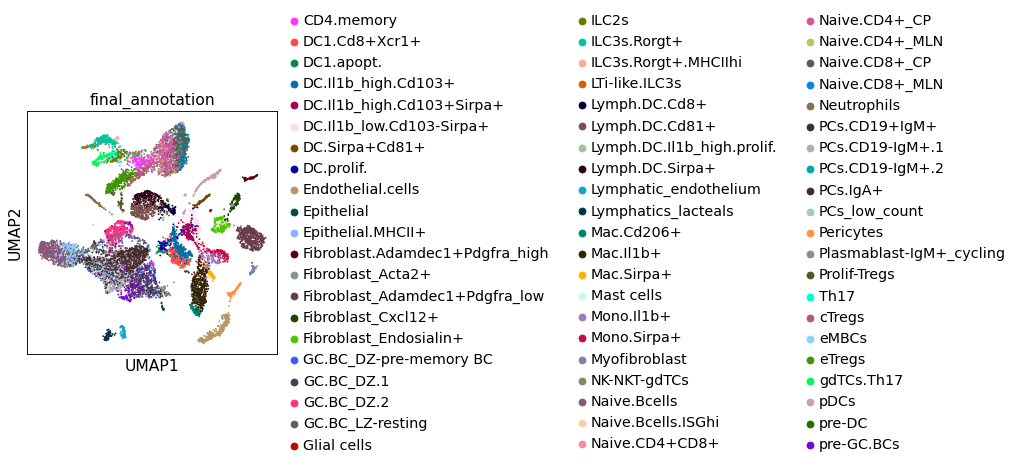

In [22]:
 sc.pl.umap(adata_clean, color="final_annotation")

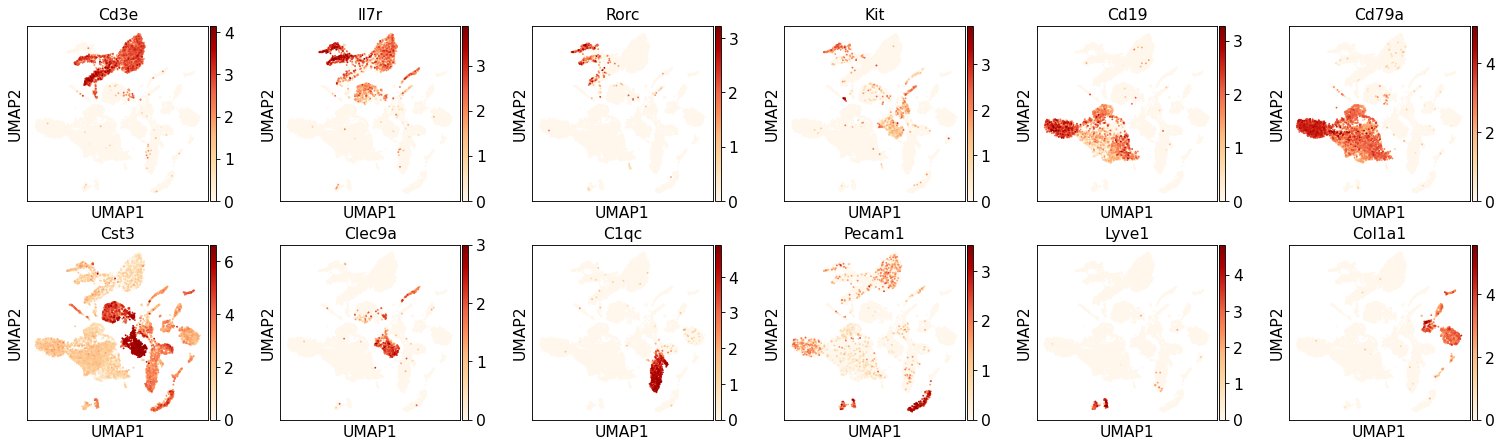

In [29]:
with mpl.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(adata_clean, color = ['Cd3e','Il7r','Rorc','Kit','Cd19','Cd79a','Cst3',"Clec9a",'C1qc', 'Pecam1','Lyve1', 'Col1a1'], 
    save='FinalUmap_all_woDoublets_lineages_marker_genes.pdf',legend_fontsize=10, legend_fontoutline=1,ncols=6)

# 2nd May 2023 - Il2ra expression check up

In [6]:
adata=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/final_woDoublets_goodLabels.h5ad')

In [24]:
adata_f = adata[adata.obs['cellsubsetLoc'].map(adata.obs['cellsubsetLoc'].value_counts())>30]

In [8]:
adata_TCsMye = adata[adata.obs["lineage_final"].isin(['Myeloid','ILCs-T.cells'])]

In [9]:
adata_fTCsMye = adata_TCsMye[adata_TCsMye.obs['cellsubsetLoc'].map(adata_TCsMye.obs['cellsubsetLoc'].value_counts())>30]

<AxesSubplot:>

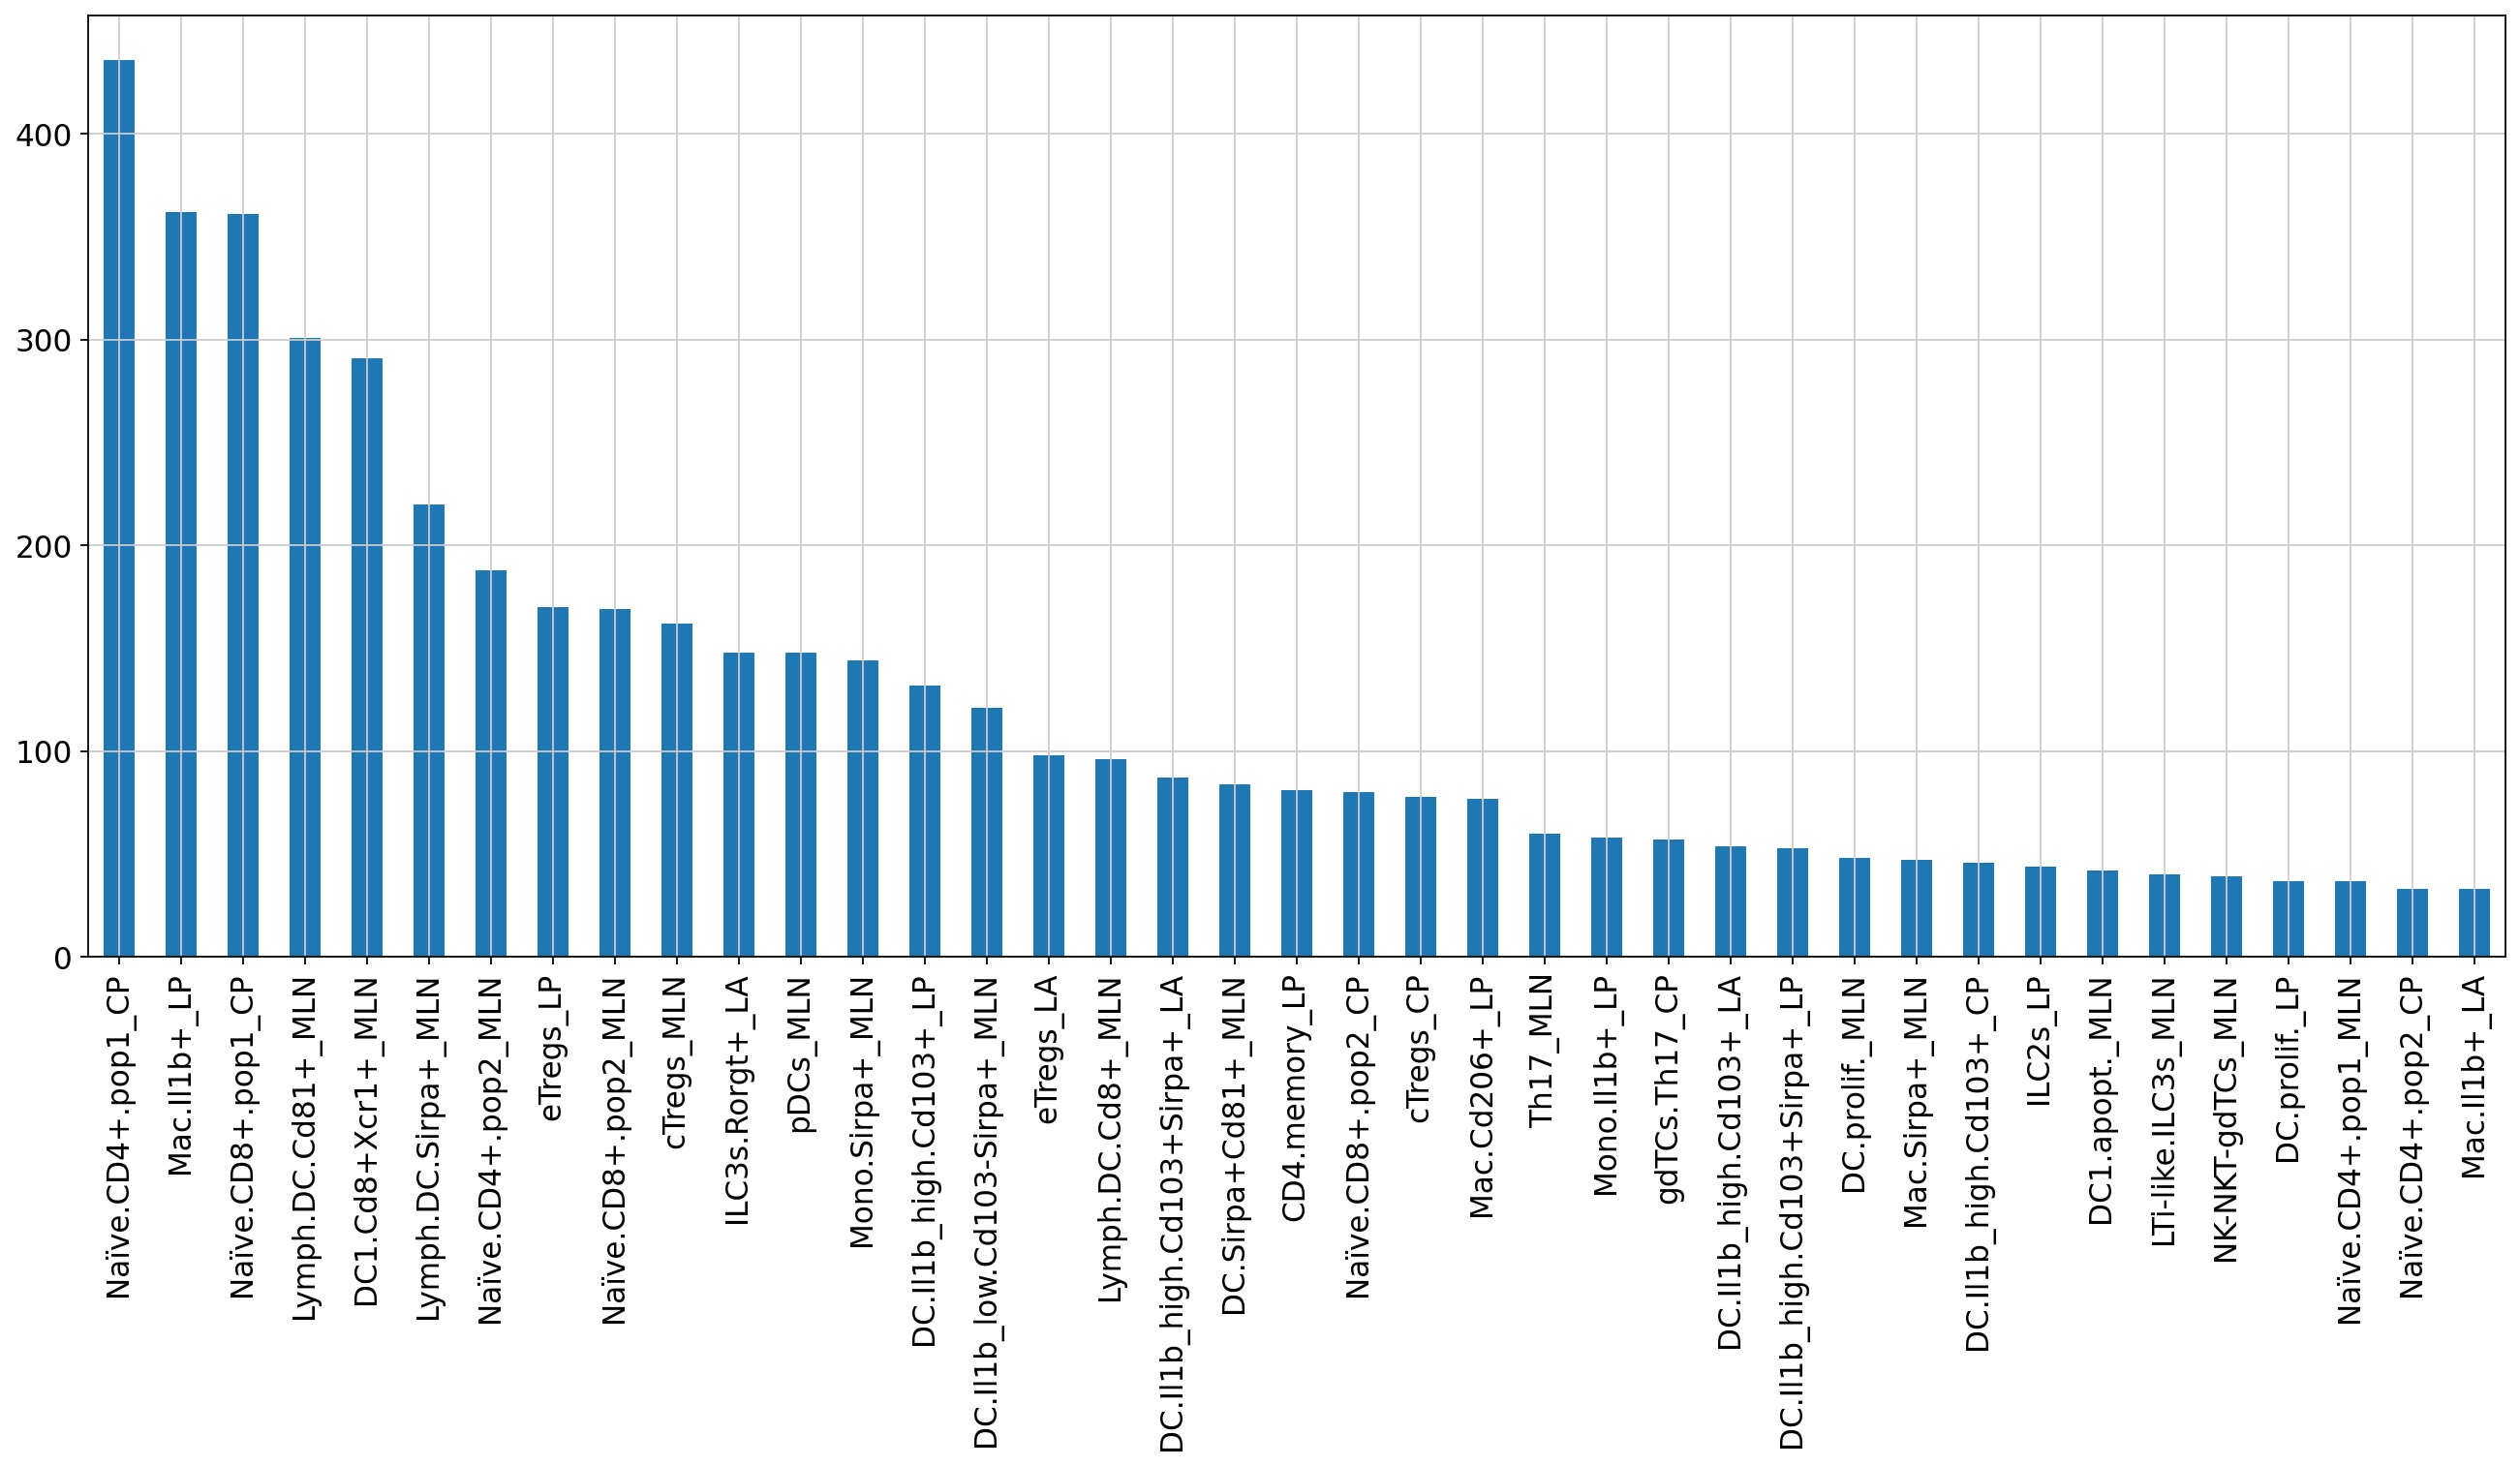

In [10]:
adata_fTCsMye.obs['cellsubsetLoc'].value_counts().plot(kind='bar', figsize=(20,8))

In [438]:
#adata_fTCsMye 

In [11]:
adata_fTCsMye_LA_LP=adata_fTCsMye[adata_fTCsMye.obs["location"].isin(['LA','LP'])]

In [12]:
adata_fTCsMye_LA_LP.obs['cellsubsetLoc'].value_counts().plot(kind='bar', figsize=(20,8))

<AxesSubplot:>

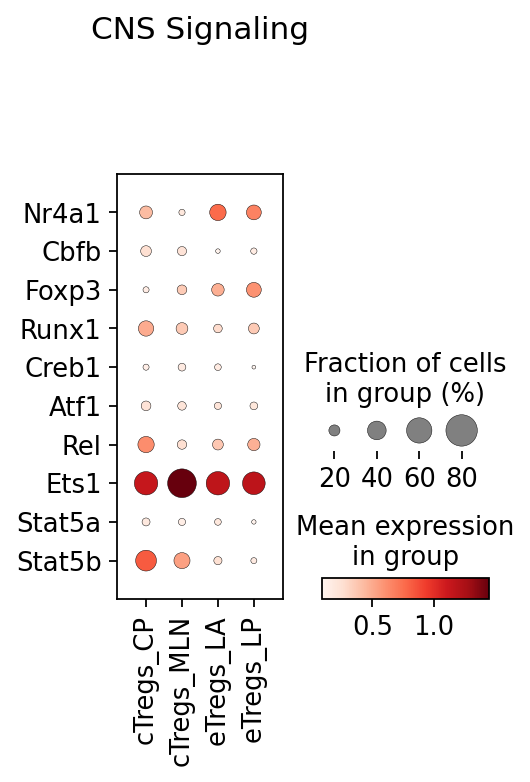

In [214]:
with rc_context({'figure.figsize': (7, 3)}):
    sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Nr4a1', 'Cbfb', 'Foxp3', 'Runx1', 'Creb1', 'Atf1', 'Rel', 'Ets1', 'Stat5a', 'Stat5b'],
                  groupby='cellsubsetLoc', use_raw=True, swap_axes=True, title='CNS Signaling', save='CNS.signalling_Tregs-all.pdf')

In [22]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye_LA_LP, ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression', use_raw=True, swap_axes=True)
    
#save='Il2ra_expression.pdf'

In [48]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye, ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression all regions', use_raw=True, swap_axes=True)
    
#save='Il2ra_expression.pdf'

In [49]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_fTCsMye, ['Il2ra', 'Ccr8'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression all regions', use_raw=True, swap_axes=True)
    
#save='Il2ra_expression.pdf'

In [30]:
adata_f.obs["lineage_final"].value_counts()

B-PCs           3761
Myeloid         2481
ILCs-T.cells    2281
Mesenchymal     1244
Granulocytes      66
Name: lineage_final, dtype: int64

In [31]:
adata_f2 = adata_f[~adata_f.obs["lineage_final"].isin(['Mesenchymal'])]

In [37]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['MLN'])], ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in MLN', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

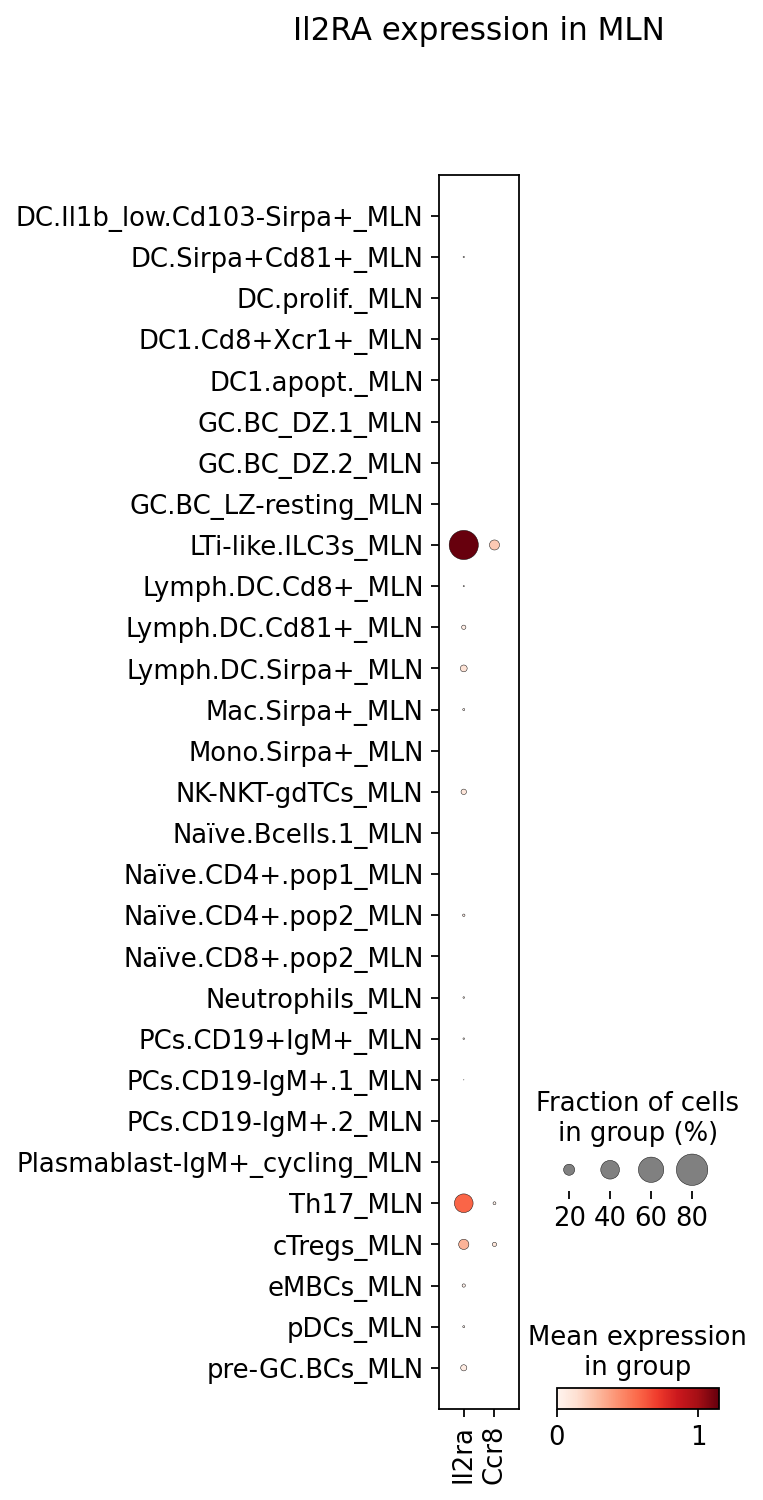

In [44]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['MLN'])], ['Il2ra', 'Ccr8'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in MLN', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

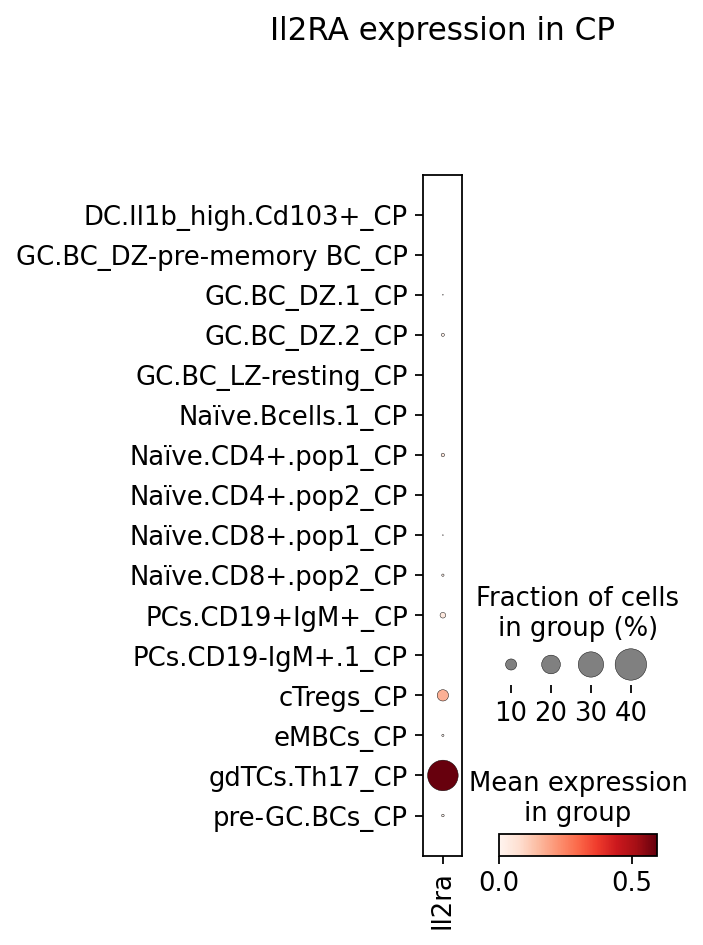

In [38]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['CP'])], ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in CP', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

In [45]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['CP'])], ['Il2ra', 'Ccr8'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in CP', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

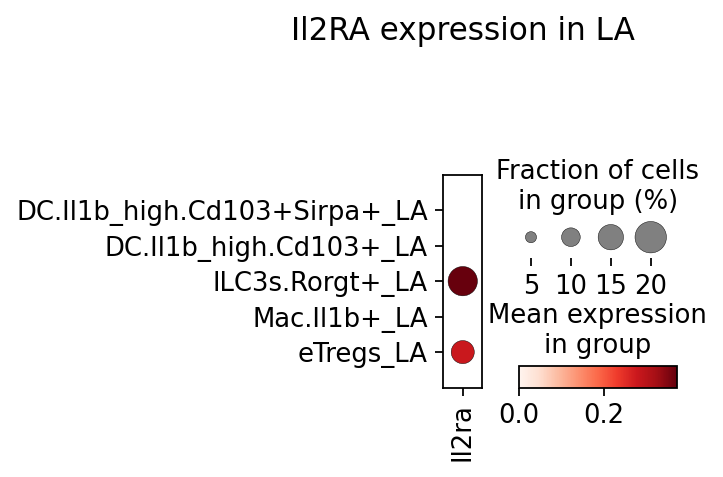

In [39]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['LA'])], ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in LA', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

In [43]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['LA'])], ['Il2ra', 'Ccr8'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in LA', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

In [40]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['LP'])], ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in LP', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

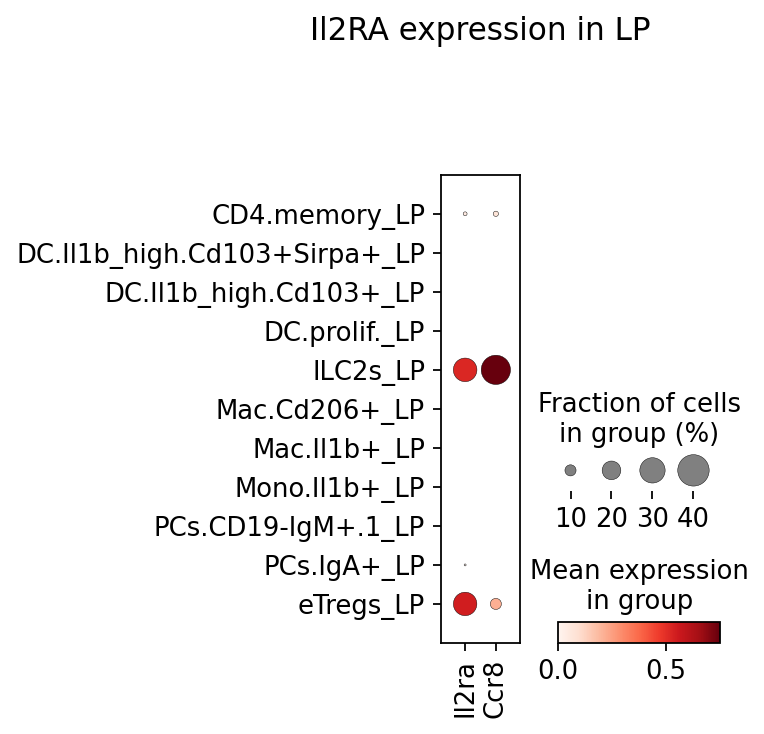

In [42]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2[adata_f2.obs["location"].isin(['LP'])], ['Il2ra', 'Ccr8'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression in LP', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'

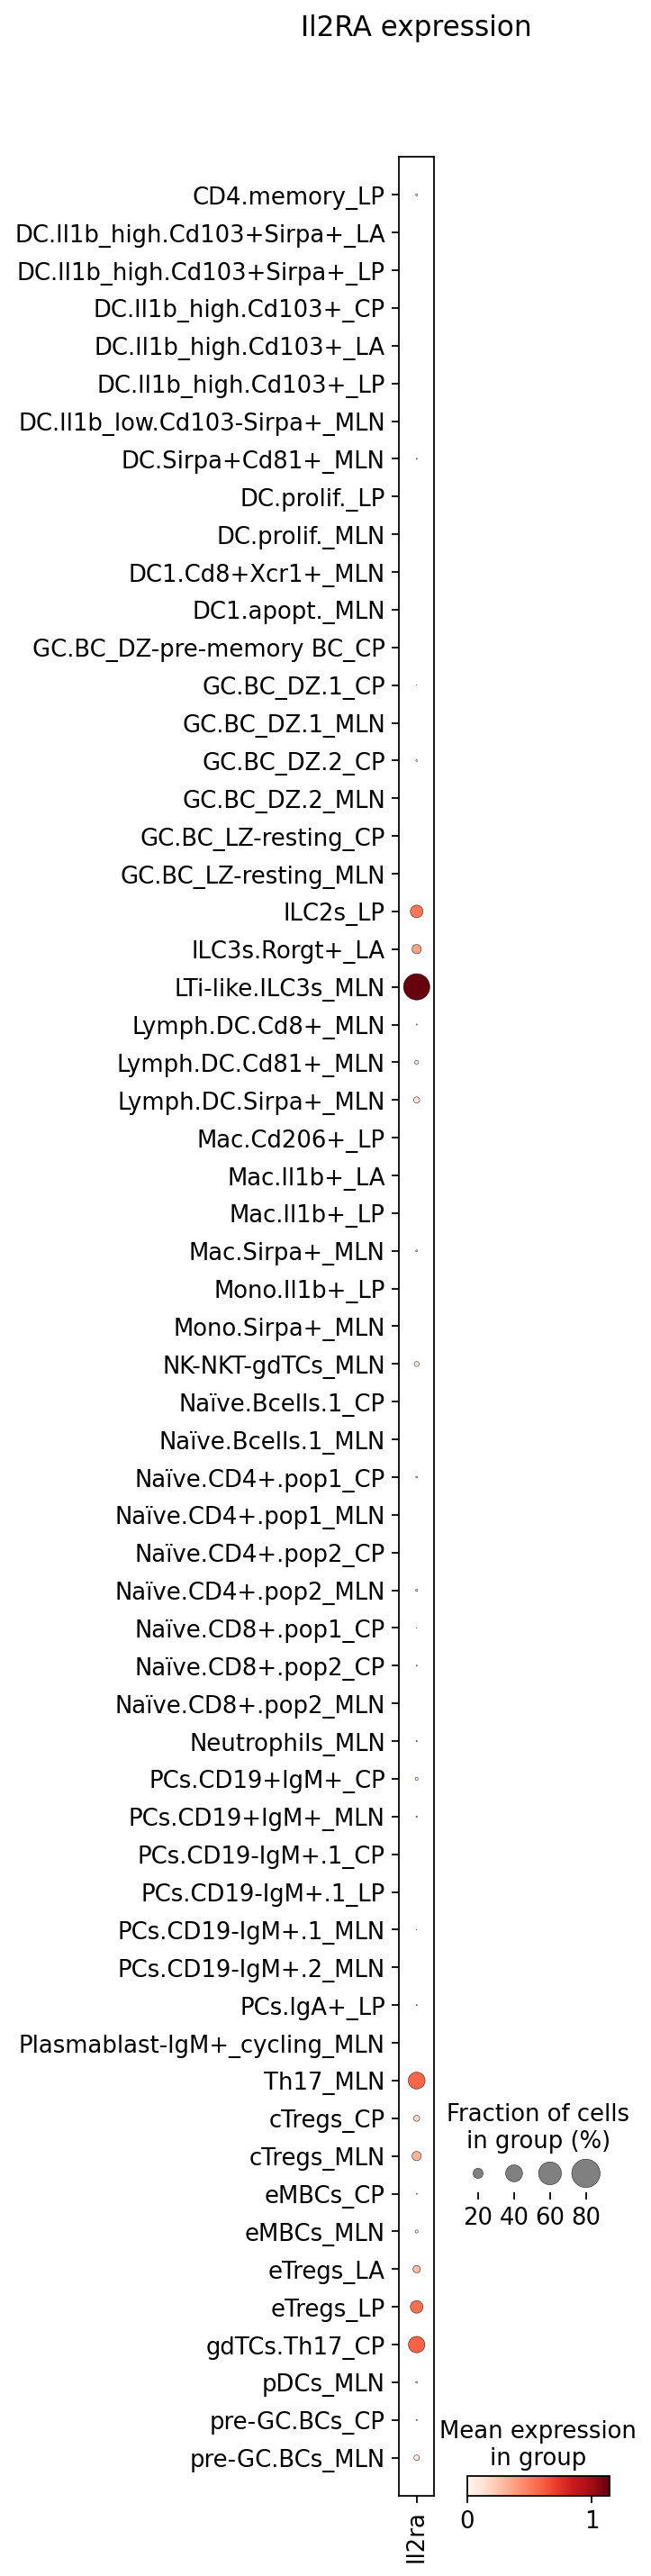

In [34]:
#sc.tl.dendrogram(adata_f[adata_f.obs["location"].isin(['3ILF'])], groupby='cellsubsetLoc')
#'Il6', 'Il7', 'Il9', 'Il10', 'Il11', 'Il15', 'Il21', 'Il22', 'Il27','Lif','Ifna1','Ifnb1','Met', 'Osm','Lep','Gh1' Gene list
# Cannot find: 'Gh1', 'Ifna1', 'Ifnb1', 'Il9', 'Lep
with mpl.rc_context({'figure.figsize': (8, 3)}):
    sc.pl.dotplot(adata_f2, ['Il2ra'], groupby='cellsubsetLoc', dendrogram=False, 
                  title='Il2RA expression', use_raw=True, swap_axes=False)
    
#save='Il2ra_expression.pdf'